# Active fires MODIS gridding with hysplit

In this Jupyter notebook we process the back trajectories with NASA Active Fire Data. We count the number of active fires in a grid box and then count the number active fires within the grid boxes that the back trajectories pass over.  

https://firms.modaps.eosdis.nasa.gov/download/list.php

Choose the achieve data .csv files https://firms.modaps.eosdis.nasa.gov/download/list.php

***FigureS7*** could be made with this - however script has been updated slightly 

In [1]:
import sys

sys.path.append(r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts\Active-fire-count')

import active_fire_count_functions as fu_fire
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'active_fire_count_functions'

In [3]:
#find the size of loaded variables
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

               NamespaceMagics:  896.0 B
                           _i3:  611.0 B
                      datetime:  416.0 B
                     timedelta:  416.0 B
                            _i:  318.0 B
                           _i2:  318.0 B
                           _ii:  248.0 B
                           _i1:  248.0 B
                           _oh:  232.0 B
                           Out:  232.0 B


In [4]:
df_abs637 = fu_fire.load_df(loadpath=r'C:\Users\DominicHeslinRees\Documents\Analysis\absorption', 
                            extrapath='appended', filename='oldpsap_newpsap_maap')

loading: C:\Users\DominicHeslinRees\Documents\Analysis\absorption\appended\oldpsap_newpsap_maap.dat


# Load fire data for a year e.g. 2020 

## Example: 

In [4]:
df_fire_2020 = fu_fire.load_fire_data_for_year('C:\\Users\\DominicHeslinRees\\Documents\\Data\\NASA_FIRE\\MODIS\\', 2020)

files: 1
4464712
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
2367936


In [5]:
df_fire_2020.head(2)

latitude  longitude  brightness  scan  track  acq_time satellite  \
acq_date                                                                       
2020-01-01   52.1592    10.4152       300.3   1.9    1.3       101      Aqua   
2020-01-01   31.7092     5.9626       304.6   1.9    1.3       106      Aqua   

           instrument  confidence  version  bright_t31   frp daynight  type  \
acq_date                                                                      
2020-01-01      MODIS          23     6.03       272.3  23.0        N     2   
2020-01-01      MODIS          61     6.03       272.2  27.4        N     2   

            month month_abbr  
acq_date                      
2020-01-01      1        Jan  
2020-01-01      1        Jan

## plot yearly fire data: 

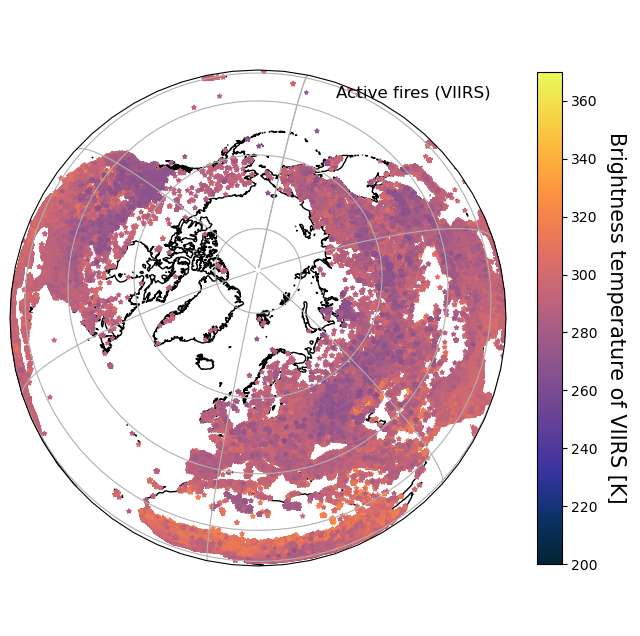

In [6]:
fig = fu_fire.make_fire_plot(df_fire_2020)

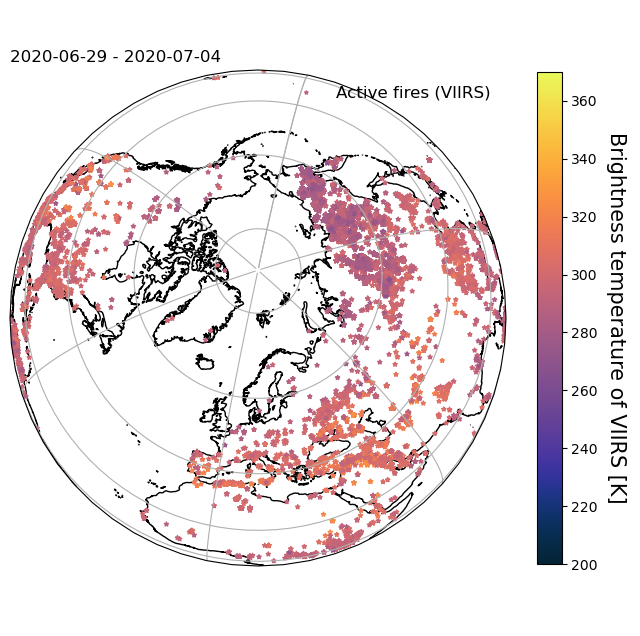

In [7]:
fig = fu_fire.plot_slice_dates(df_fire_2020, start_date='2020-06-29', end_date='2020-07-04')

## produce dictionary of df fire trajs 

<!-- # produce dictionary of fire trajs: -->

In [11]:
df_fire_2020, trajs_dictionary_2020 = fu_fire.produce_df_fire_trajs_dictionary(df_abs637, 2020, 
                                                                               fire_path='C:\\Users\\DominicHeslinRees\\Documents\\Data\\NASA_FIRE\\MODIS\\',
                                                                               inpath_processed_hysplit_dfs="F:\\HYSPLIT\\processed\\")

files: 1
4464712
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
2367936
Year: 2020
Path: F:\HYSPLIT\processed\2020\
Number of HYSPLIT files for 2020: 8752
Matching files from observational data & HYSPLIT: 8675
mixed layer selected
F:\HYSPLIT\processed\2020\20200227_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-27 03:00:00
F:\HYSPLIT\processed\2020\20200227_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-27 04:00:00
F:\HYSPLIT\processed\2020\20200227_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-27 05:00:00
F:\HYSPLIT\processed\2020\20200227_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-27 06:00:00
F:\HYSPLIT\processed\2020\20200227_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-27 07:00:00
F:\HYSPLIT\processed\2020\20200227_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-27 08:00:00
F:\HYSPLIT\processed\2020\20200227_09.pickle
cut the traj 

6480
arrival time: 2020-05-03 14:00:00
F:\HYSPLIT\processed\2020\20200503_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-03 15:00:00
F:\HYSPLIT\processed\2020\20200503_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-03 16:00:00
F:\HYSPLIT\processed\2020\20200503_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-03 17:00:00
F:\HYSPLIT\processed\2020\20200503_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-03 18:00:00
F:\HYSPLIT\processed\2020\20200503_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-03 19:00:00
F:\HYSPLIT\processed\2020\20200503_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-03 20:00:00
F:\HYSPLIT\processed\2020\20200503_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-03 21:00:00
F:\HYSPLIT\processed\2020\20200503_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-03 22:00:00
F:\HYSPLIT\processed\2020\20200503_23.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-05-06 15:00:00
F:\HYSPLIT\processed\2020\20200506_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-06 16:00:00
F:\HYSPLIT\processed\2020\20200506_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-06 17:00:00
F:\HYSPLIT\processed\2020\20200506_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-06 18:00:00
F:\HYSPLIT\processed\2020\20200506_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-06 19:00:00
F:\HYSPLIT\processed\2020\20200506_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-06 20:00:00
F:\HYSPLIT\processed\2020\20200506_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-06 21:00:00
F:\HYSPLIT\processed\2020\20200506_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-06 22:00:00
F:\HYSPLIT\processed\2020\20200506_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-06 23:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-05-09 19:00:00
F:\HYSPLIT\processed\2020\20200509_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-09 20:00:00
F:\HYSPLIT\processed\2020\20200509_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-09 21:00:00
F:\HYSPLIT\processed\2020\20200509_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-09 22:00:00
F:\HYSPLIT\processed\2020\20200509_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-09 23:00:00
F:\HYSPLIT\processed\2020\20200510_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-10 00:00:00
F:\HYSPLIT\processed\2020\20200510_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-10 01:00:00
F:\HYSPLIT\processed\2020\20200510_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-10 02:00:00
F:\HYSPLIT\processed\2020\20200510_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-10 03:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-05-12 21:00:00
F:\HYSPLIT\processed\2020\20200512_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-12 22:00:00
F:\HYSPLIT\processed\2020\20200512_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-12 23:00:00
F:\HYSPLIT\processed\2020\20200513_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-13 00:00:00
F:\HYSPLIT\processed\2020\20200513_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-13 01:00:00
F:\HYSPLIT\processed\2020\20200513_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-13 02:00:00
F:\HYSPLIT\processed\2020\20200513_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-13 03:00:00
F:\HYSPLIT\processed\2020\20200513_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-13 04:00:00
F:\HYSPLIT\processed\2020\20200513_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-13 05:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-05-15 21:00:00
F:\HYSPLIT\processed\2020\20200515_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-15 22:00:00
F:\HYSPLIT\processed\2020\20200515_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-15 23:00:00
F:\HYSPLIT\processed\2020\20200516_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-16 00:00:00
F:\HYSPLIT\processed\2020\20200516_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-16 01:00:00
F:\HYSPLIT\processed\2020\20200516_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-16 02:00:00
F:\HYSPLIT\processed\2020\20200516_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-16 03:00:00
F:\HYSPLIT\processed\2020\20200516_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-16 04:00:00
F:\HYSPLIT\processed\2020\20200516_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-16 05:00:00
F:\HYSPLIT\processed\2020\20200516_06.pickle
cut 

6480
arrival time: 2020-05-19 00:00:00
F:\HYSPLIT\processed\2020\20200519_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-19 01:00:00
F:\HYSPLIT\processed\2020\20200519_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-19 02:00:00
F:\HYSPLIT\processed\2020\20200519_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-19 03:00:00
F:\HYSPLIT\processed\2020\20200519_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-19 04:00:00
F:\HYSPLIT\processed\2020\20200519_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-19 05:00:00
F:\HYSPLIT\processed\2020\20200519_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-19 06:00:00
F:\HYSPLIT\processed\2020\20200519_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-19 07:00:00
F:\HYSPLIT\processed\2020\20200519_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-19 08:00:00
F:\HYSPLIT\processed\2020\20200519_09.pickle
cut 

6480
arrival time: 2020-05-22 04:00:00
F:\HYSPLIT\processed\2020\20200522_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-22 05:00:00
F:\HYSPLIT\processed\2020\20200522_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-22 06:00:00
F:\HYSPLIT\processed\2020\20200522_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-22 07:00:00
F:\HYSPLIT\processed\2020\20200522_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-22 08:00:00
F:\HYSPLIT\processed\2020\20200522_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-22 09:00:00
F:\HYSPLIT\processed\2020\20200522_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-22 10:00:00
F:\HYSPLIT\processed\2020\20200522_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-22 11:00:00
F:\HYSPLIT\processed\2020\20200522_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-22 12:00:00
F:\HYSPLIT\processed\2020\20200522_13.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-05-25 07:00:00
F:\HYSPLIT\processed\2020\20200525_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-25 08:00:00
F:\HYSPLIT\processed\2020\20200525_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-25 09:00:00
F:\HYSPLIT\processed\2020\20200525_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-25 10:00:00
F:\HYSPLIT\processed\2020\20200525_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-25 11:00:00
F:\HYSPLIT\processed\2020\20200525_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-25 12:00:00
F:\HYSPLIT\processed\2020\20200525_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-25 13:00:00
F:\HYSPLIT\processed\2020\20200525_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-25 14:00:00
F:\HYSPLIT\processed\2020\20200525_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-25 15:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-05-28 09:00:00
F:\HYSPLIT\processed\2020\20200528_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-28 10:00:00
F:\HYSPLIT\processed\2020\20200528_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-28 11:00:00
F:\HYSPLIT\processed\2020\20200528_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-28 12:00:00
F:\HYSPLIT\processed\2020\20200528_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-28 13:00:00
F:\HYSPLIT\processed\2020\20200528_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-28 14:00:00
F:\HYSPLIT\processed\2020\20200528_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-28 15:00:00
F:\HYSPLIT\processed\2020\20200528_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-28 16:00:00
F:\HYSPLIT\processed\2020\20200528_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-28 17:00:00
F:\HYSPLIT\processed\2020\20200528_18.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-01-03 02:00:00
F:\HYSPLIT\processed\2020\20200103_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-03 03:00:00
F:\HYSPLIT\processed\2020\20200103_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-03 04:00:00
F:\HYSPLIT\processed\2020\20200103_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-03 05:00:00
F:\HYSPLIT\processed\2020\20200103_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-03 06:00:00
F:\HYSPLIT\processed\2020\20200103_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-03 07:00:00
F:\HYSPLIT\processed\2020\20200103_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-03 08:00:00
F:\HYSPLIT\processed\2020\20200103_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-03 09:00:00
F:\HYSPLIT\processed\2020\20200103_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-03 10:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-01-06 05:00:00
F:\HYSPLIT\processed\2020\20200106_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-06 06:00:00
F:\HYSPLIT\processed\2020\20200106_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-06 07:00:00
F:\HYSPLIT\processed\2020\20200106_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-06 08:00:00
F:\HYSPLIT\processed\2020\20200106_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-06 09:00:00
F:\HYSPLIT\processed\2020\20200106_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-06 10:00:00
F:\HYSPLIT\processed\2020\20200106_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-06 11:00:00
F:\HYSPLIT\processed\2020\20200106_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-06 12:00:00
F:\HYSPLIT\processed\2020\20200106_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-06 13:00:00
F:\HYSPLIT\processed\2020\20200106_14.pickle
cut 

6480
arrival time: 2020-01-09 09:00:00
F:\HYSPLIT\processed\2020\20200109_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-09 10:00:00
F:\HYSPLIT\processed\2020\20200109_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-09 11:00:00
F:\HYSPLIT\processed\2020\20200109_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-09 12:00:00
F:\HYSPLIT\processed\2020\20200109_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-09 13:00:00
F:\HYSPLIT\processed\2020\20200109_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-09 14:00:00
F:\HYSPLIT\processed\2020\20200109_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-09 15:00:00
F:\HYSPLIT\processed\2020\20200109_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-09 16:00:00
F:\HYSPLIT\processed\2020\20200109_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-09 17:00:00
F:\HYSPLIT\processed\2020\20200109_18.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-01-12 13:00:00
F:\HYSPLIT\processed\2020\20200112_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-12 14:00:00
F:\HYSPLIT\processed\2020\20200112_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-12 15:00:00
F:\HYSPLIT\processed\2020\20200112_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-12 16:00:00
F:\HYSPLIT\processed\2020\20200112_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-12 17:00:00
F:\HYSPLIT\processed\2020\20200112_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-12 18:00:00
F:\HYSPLIT\processed\2020\20200112_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-12 19:00:00
F:\HYSPLIT\processed\2020\20200112_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-12 20:00:00
F:\HYSPLIT\processed\2020\20200112_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-12 21:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-01-15 16:00:00
F:\HYSPLIT\processed\2020\20200115_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-15 17:00:00
F:\HYSPLIT\processed\2020\20200115_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-15 18:00:00
F:\HYSPLIT\processed\2020\20200115_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-15 19:00:00
F:\HYSPLIT\processed\2020\20200115_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-15 20:00:00
F:\HYSPLIT\processed\2020\20200115_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-15 21:00:00
F:\HYSPLIT\processed\2020\20200115_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-15 22:00:00
F:\HYSPLIT\processed\2020\20200115_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-15 23:00:00
F:\HYSPLIT\processed\2020\20200116_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-16 00:00:00
F:\HYSPLIT\processed\2020\20200116_01.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-01-18 17:00:00
F:\HYSPLIT\processed\2020\20200118_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-18 18:00:00
F:\HYSPLIT\processed\2020\20200118_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-18 19:00:00
F:\HYSPLIT\processed\2020\20200118_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-18 20:00:00
F:\HYSPLIT\processed\2020\20200118_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-18 21:00:00
F:\HYSPLIT\processed\2020\20200118_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-18 22:00:00
F:\HYSPLIT\processed\2020\20200118_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-18 23:00:00
F:\HYSPLIT\processed\2020\20200119_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-19 00:00:00
F:\HYSPLIT\processed\2020\20200119_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-19 01:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-01-21 21:00:00
F:\HYSPLIT\processed\2020\20200121_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-21 22:00:00
F:\HYSPLIT\processed\2020\20200121_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-21 23:00:00
F:\HYSPLIT\processed\2020\20200122_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-22 00:00:00
F:\HYSPLIT\processed\2020\20200122_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-22 01:00:00
F:\HYSPLIT\processed\2020\20200122_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-22 02:00:00
F:\HYSPLIT\processed\2020\20200122_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-22 03:00:00
F:\HYSPLIT\processed\2020\20200122_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-22 04:00:00
F:\HYSPLIT\processed\2020\20200122_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-22 05:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-01-24 21:00:00
F:\HYSPLIT\processed\2020\20200124_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-24 22:00:00
F:\HYSPLIT\processed\2020\20200124_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-24 23:00:00
F:\HYSPLIT\processed\2020\20200125_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-25 00:00:00
F:\HYSPLIT\processed\2020\20200125_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-25 01:00:00
F:\HYSPLIT\processed\2020\20200125_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-25 02:00:00
F:\HYSPLIT\processed\2020\20200125_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-25 03:00:00
F:\HYSPLIT\processed\2020\20200125_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-25 04:00:00
F:\HYSPLIT\processed\2020\20200125_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-25 05:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-01-27 23:00:00
F:\HYSPLIT\processed\2020\20200128_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-28 00:00:00
F:\HYSPLIT\processed\2020\20200128_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-28 01:00:00
F:\HYSPLIT\processed\2020\20200128_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-28 02:00:00
F:\HYSPLIT\processed\2020\20200128_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-28 03:00:00
F:\HYSPLIT\processed\2020\20200128_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-28 04:00:00
F:\HYSPLIT\processed\2020\20200128_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-28 05:00:00
F:\HYSPLIT\processed\2020\20200128_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-28 06:00:00
F:\HYSPLIT\processed\2020\20200128_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-28 07:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-01-31 00:00:00
F:\HYSPLIT\processed\2020\20200131_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-31 01:00:00
F:\HYSPLIT\processed\2020\20200131_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-31 02:00:00
F:\HYSPLIT\processed\2020\20200131_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-31 03:00:00
F:\HYSPLIT\processed\2020\20200131_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-31 04:00:00
F:\HYSPLIT\processed\2020\20200131_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-31 05:00:00
F:\HYSPLIT\processed\2020\20200131_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-31 06:00:00
F:\HYSPLIT\processed\2020\20200131_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-31 07:00:00
F:\HYSPLIT\processed\2020\20200131_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-01-31 08:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-02-03 10:00:00
F:\HYSPLIT\processed\2020\20200203_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-03 11:00:00
F:\HYSPLIT\processed\2020\20200203_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-03 12:00:00
F:\HYSPLIT\processed\2020\20200203_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-03 13:00:00
F:\HYSPLIT\processed\2020\20200203_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-03 14:00:00
F:\HYSPLIT\processed\2020\20200203_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-03 15:00:00
F:\HYSPLIT\processed\2020\20200203_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-03 16:00:00
F:\HYSPLIT\processed\2020\20200203_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-03 17:00:00
F:\HYSPLIT\processed\2020\20200203_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-03 18:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-02-06 12:00:00
F:\HYSPLIT\processed\2020\20200206_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-06 13:00:00
F:\HYSPLIT\processed\2020\20200206_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-06 14:00:00
F:\HYSPLIT\processed\2020\20200206_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-06 15:00:00
F:\HYSPLIT\processed\2020\20200206_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-06 16:00:00
F:\HYSPLIT\processed\2020\20200206_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-06 17:00:00
F:\HYSPLIT\processed\2020\20200206_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-06 18:00:00
F:\HYSPLIT\processed\2020\20200206_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-06 19:00:00
F:\HYSPLIT\processed\2020\20200206_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-06 20:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-02-09 13:00:00
F:\HYSPLIT\processed\2020\20200209_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-09 14:00:00
F:\HYSPLIT\processed\2020\20200209_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-09 15:00:00
F:\HYSPLIT\processed\2020\20200209_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-09 16:00:00
F:\HYSPLIT\processed\2020\20200209_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-09 17:00:00
F:\HYSPLIT\processed\2020\20200209_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-09 18:00:00
F:\HYSPLIT\processed\2020\20200209_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-09 19:00:00
F:\HYSPLIT\processed\2020\20200209_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-09 20:00:00
F:\HYSPLIT\processed\2020\20200209_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-09 21:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-02-12 16:00:00
F:\HYSPLIT\processed\2020\20200212_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-12 17:00:00
F:\HYSPLIT\processed\2020\20200212_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-12 18:00:00
F:\HYSPLIT\processed\2020\20200212_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-12 19:00:00
F:\HYSPLIT\processed\2020\20200212_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-12 20:00:00
F:\HYSPLIT\processed\2020\20200212_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-12 21:00:00
F:\HYSPLIT\processed\2020\20200212_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-12 22:00:00
F:\HYSPLIT\processed\2020\20200212_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-12 23:00:00
F:\HYSPLIT\processed\2020\20200213_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-13 00:00:00
F:\HYSPLIT\processed\2020\20200213_01.pickle
cut 

6480
arrival time: 2020-02-15 16:00:00
F:\HYSPLIT\processed\2020\20200215_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-15 17:00:00
F:\HYSPLIT\processed\2020\20200215_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-15 18:00:00
F:\HYSPLIT\processed\2020\20200215_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-15 19:00:00
F:\HYSPLIT\processed\2020\20200215_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-15 20:00:00
F:\HYSPLIT\processed\2020\20200215_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-15 21:00:00
F:\HYSPLIT\processed\2020\20200215_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-15 22:00:00
F:\HYSPLIT\processed\2020\20200215_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-15 23:00:00
F:\HYSPLIT\processed\2020\20200216_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-16 00:00:00
F:\HYSPLIT\processed\2020\20200216_01.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-02-18 18:00:00
F:\HYSPLIT\processed\2020\20200218_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-18 19:00:00
F:\HYSPLIT\processed\2020\20200218_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-18 20:00:00
F:\HYSPLIT\processed\2020\20200218_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-18 21:00:00
F:\HYSPLIT\processed\2020\20200218_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-18 22:00:00
F:\HYSPLIT\processed\2020\20200218_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-18 23:00:00
F:\HYSPLIT\processed\2020\20200219_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-19 00:00:00
F:\HYSPLIT\processed\2020\20200219_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-19 01:00:00
F:\HYSPLIT\processed\2020\20200219_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-19 02:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-02-21 23:00:00
F:\HYSPLIT\processed\2020\20200222_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-22 00:00:00
F:\HYSPLIT\processed\2020\20200222_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-22 01:00:00
F:\HYSPLIT\processed\2020\20200222_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-22 02:00:00
F:\HYSPLIT\processed\2020\20200222_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-22 03:00:00
F:\HYSPLIT\processed\2020\20200222_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-22 04:00:00
F:\HYSPLIT\processed\2020\20200222_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-22 05:00:00
F:\HYSPLIT\processed\2020\20200222_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-22 06:00:00
F:\HYSPLIT\processed\2020\20200222_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-22 07:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-02-24 23:00:00
F:\HYSPLIT\processed\2020\20200225_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-25 00:00:00
F:\HYSPLIT\processed\2020\20200225_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-25 01:00:00
F:\HYSPLIT\processed\2020\20200225_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-25 02:00:00
F:\HYSPLIT\processed\2020\20200225_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-25 03:00:00
F:\HYSPLIT\processed\2020\20200225_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-25 04:00:00
F:\HYSPLIT\processed\2020\20200225_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-25 05:00:00
F:\HYSPLIT\processed\2020\20200225_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-25 06:00:00
F:\HYSPLIT\processed\2020\20200225_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-25 07:00:00
F:\HYSPLIT\processed\2020\20200225_08.pickle
cut 

6480
arrival time: 2020-02-28 17:00:00
F:\HYSPLIT\processed\2020\20200228_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-28 18:00:00
F:\HYSPLIT\processed\2020\20200228_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-28 19:00:00
F:\HYSPLIT\processed\2020\20200228_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-28 20:00:00
F:\HYSPLIT\processed\2020\20200228_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-28 21:00:00
F:\HYSPLIT\processed\2020\20200228_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-28 22:00:00
F:\HYSPLIT\processed\2020\20200228_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-28 23:00:00
F:\HYSPLIT\processed\2020\20200229_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-29 00:00:00
F:\HYSPLIT\processed\2020\20200229_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-02-29 01:00:00
F:\HYSPLIT\processed\2020\20200229_02.pickle
cut 

cut the traj by :10 days
6345
6345
arrival time: 2020-03-02 18:00:00
F:\HYSPLIT\processed\2020\20200302_19.pickle
cut the traj by :10 days
6372
6372
arrival time: 2020-03-02 19:00:00
F:\HYSPLIT\processed\2020\20200302_20.pickle
cut the traj by :10 days
6399
6399
arrival time: 2020-03-02 20:00:00
F:\HYSPLIT\processed\2020\20200302_21.pickle
cut the traj by :10 days
6426
6426
arrival time: 2020-03-02 21:00:00
F:\HYSPLIT\processed\2020\20200302_22.pickle
cut the traj by :10 days
6453
6453
arrival time: 2020-03-02 22:00:00
F:\HYSPLIT\processed\2020\20200302_23.pickle
cut the traj by :10 days
6480
6480
arrival time: 2020-03-02 23:00:00
F:\HYSPLIT\processed\2020\20200303_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-03 00:00:00
F:\HYSPLIT\processed\2020\20200303_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-03 01:00:00
F:\HYSPLIT\processed\2020\20200303_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-03 02:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-03-05 20:00:00
F:\HYSPLIT\processed\2020\20200305_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-05 21:00:00
F:\HYSPLIT\processed\2020\20200305_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-05 22:00:00
F:\HYSPLIT\processed\2020\20200305_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-05 23:00:00
F:\HYSPLIT\processed\2020\20200306_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-06 00:00:00
F:\HYSPLIT\processed\2020\20200306_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-06 01:00:00
F:\HYSPLIT\processed\2020\20200306_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-06 02:00:00
F:\HYSPLIT\processed\2020\20200306_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-06 03:00:00
F:\HYSPLIT\processed\2020\20200306_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-06 04:00:00
F:\HYSPLIT\processed\2020\20200306_05.pickle
cut 

6480
arrival time: 2020-03-08 23:00:00
F:\HYSPLIT\processed\2020\20200309_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-09 00:00:00
F:\HYSPLIT\processed\2020\20200309_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-09 01:00:00
F:\HYSPLIT\processed\2020\20200309_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-09 02:00:00
F:\HYSPLIT\processed\2020\20200309_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-09 03:00:00
F:\HYSPLIT\processed\2020\20200309_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-09 04:00:00
F:\HYSPLIT\processed\2020\20200309_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-09 05:00:00
F:\HYSPLIT\processed\2020\20200309_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-09 06:00:00
F:\HYSPLIT\processed\2020\20200309_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-09 07:00:00
F:\HYSPLIT\processed\2020\20200309_08.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-03-12 02:00:00
F:\HYSPLIT\processed\2020\20200312_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-12 03:00:00
F:\HYSPLIT\processed\2020\20200312_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-12 04:00:00
F:\HYSPLIT\processed\2020\20200312_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-12 05:00:00
F:\HYSPLIT\processed\2020\20200312_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-12 06:00:00
F:\HYSPLIT\processed\2020\20200312_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-12 07:00:00
F:\HYSPLIT\processed\2020\20200312_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-12 08:00:00
F:\HYSPLIT\processed\2020\20200312_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-12 09:00:00
F:\HYSPLIT\processed\2020\20200312_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-12 10:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-03-15 04:00:00
F:\HYSPLIT\processed\2020\20200315_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-15 05:00:00
F:\HYSPLIT\processed\2020\20200315_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-15 06:00:00
F:\HYSPLIT\processed\2020\20200315_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-15 07:00:00
F:\HYSPLIT\processed\2020\20200315_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-15 08:00:00
F:\HYSPLIT\processed\2020\20200315_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-15 09:00:00
F:\HYSPLIT\processed\2020\20200315_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-15 10:00:00
F:\HYSPLIT\processed\2020\20200315_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-15 11:00:00
F:\HYSPLIT\processed\2020\20200315_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-15 12:00:00
F:\HYSPLIT\processed\2020\20200315_13.pickle
cut 

6480
arrival time: 2020-03-18 04:00:00
F:\HYSPLIT\processed\2020\20200318_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-18 05:00:00
F:\HYSPLIT\processed\2020\20200318_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-18 06:00:00
F:\HYSPLIT\processed\2020\20200318_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-18 07:00:00
F:\HYSPLIT\processed\2020\20200318_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-18 08:00:00
F:\HYSPLIT\processed\2020\20200318_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-18 09:00:00
F:\HYSPLIT\processed\2020\20200318_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-18 10:00:00
F:\HYSPLIT\processed\2020\20200318_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-18 11:00:00
F:\HYSPLIT\processed\2020\20200318_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-18 12:00:00
F:\HYSPLIT\processed\2020\20200318_13.pickle
cut 

6480
arrival time: 2020-03-21 07:00:00
F:\HYSPLIT\processed\2020\20200321_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-21 08:00:00
F:\HYSPLIT\processed\2020\20200321_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-21 09:00:00
F:\HYSPLIT\processed\2020\20200321_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-21 10:00:00
F:\HYSPLIT\processed\2020\20200321_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-21 11:00:00
F:\HYSPLIT\processed\2020\20200321_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-21 12:00:00
F:\HYSPLIT\processed\2020\20200321_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-21 13:00:00
F:\HYSPLIT\processed\2020\20200321_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-21 14:00:00
F:\HYSPLIT\processed\2020\20200321_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-21 15:00:00
F:\HYSPLIT\processed\2020\20200321_16.pickle
cut 

6480
arrival time: 2020-04-02 03:00:00
F:\HYSPLIT\processed\2020\20200402_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-02 04:00:00
F:\HYSPLIT\processed\2020\20200402_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-02 05:00:00
F:\HYSPLIT\processed\2020\20200402_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-02 06:00:00
F:\HYSPLIT\processed\2020\20200402_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-02 07:00:00
F:\HYSPLIT\processed\2020\20200402_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-02 08:00:00
F:\HYSPLIT\processed\2020\20200402_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-02 09:00:00
F:\HYSPLIT\processed\2020\20200402_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-02 10:00:00
F:\HYSPLIT\processed\2020\20200402_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-02 11:00:00
F:\HYSPLIT\processed\2020\20200402_12.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-04-05 07:00:00
F:\HYSPLIT\processed\2020\20200405_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-05 08:00:00
F:\HYSPLIT\processed\2020\20200405_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-05 09:00:00
F:\HYSPLIT\processed\2020\20200405_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-05 10:00:00
F:\HYSPLIT\processed\2020\20200405_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-05 11:00:00
F:\HYSPLIT\processed\2020\20200405_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-05 12:00:00
F:\HYSPLIT\processed\2020\20200405_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-05 13:00:00
F:\HYSPLIT\processed\2020\20200405_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-05 14:00:00
F:\HYSPLIT\processed\2020\20200405_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-05 15:00:00
F:\HYSPLIT\processe

F:\HYSPLIT\processed\2020\20200408_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-08 10:00:00
F:\HYSPLIT\processed\2020\20200408_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-08 11:00:00
F:\HYSPLIT\processed\2020\20200408_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-08 12:00:00
F:\HYSPLIT\processed\2020\20200408_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-08 13:00:00
F:\HYSPLIT\processed\2020\20200408_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-08 14:00:00
F:\HYSPLIT\processed\2020\20200408_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-08 15:00:00
F:\HYSPLIT\processed\2020\20200408_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-08 16:00:00
F:\HYSPLIT\processed\2020\20200408_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-08 17:00:00
F:\HYSPLIT\processed\2020\20200408_18.pickle
cut the traj by :10 days
6507
6480
arrival 

cut the traj by :10 days
6507
6480
arrival time: 2020-04-11 10:00:00
F:\HYSPLIT\processed\2020\20200411_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-11 11:00:00
F:\HYSPLIT\processed\2020\20200411_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-11 12:00:00
F:\HYSPLIT\processed\2020\20200411_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-11 13:00:00
F:\HYSPLIT\processed\2020\20200411_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-11 14:00:00
F:\HYSPLIT\processed\2020\20200411_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-11 15:00:00
F:\HYSPLIT\processed\2020\20200411_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-11 16:00:00
F:\HYSPLIT\processed\2020\20200411_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-11 17:00:00
F:\HYSPLIT\processed\2020\20200411_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-11 18:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-04-14 12:00:00
F:\HYSPLIT\processed\2020\20200414_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-14 13:00:00
F:\HYSPLIT\processed\2020\20200414_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-14 14:00:00
F:\HYSPLIT\processed\2020\20200414_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-14 15:00:00
F:\HYSPLIT\processed\2020\20200414_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-14 16:00:00
F:\HYSPLIT\processed\2020\20200414_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-14 17:00:00
F:\HYSPLIT\processed\2020\20200414_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-14 18:00:00
F:\HYSPLIT\processed\2020\20200414_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-14 19:00:00
F:\HYSPLIT\processed\2020\20200414_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-14 20:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-04-17 14:00:00
F:\HYSPLIT\processed\2020\20200417_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-17 15:00:00
F:\HYSPLIT\processed\2020\20200417_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-17 16:00:00
F:\HYSPLIT\processed\2020\20200417_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-17 17:00:00
F:\HYSPLIT\processed\2020\20200417_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-17 18:00:00
F:\HYSPLIT\processed\2020\20200417_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-17 19:00:00
F:\HYSPLIT\processed\2020\20200417_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-17 20:00:00
F:\HYSPLIT\processed\2020\20200417_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-17 21:00:00
F:\HYSPLIT\processed\2020\20200417_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-17 22:00:00
F:\HYSPLIT\processed\2020\20200417_23.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-04-20 17:00:00
F:\HYSPLIT\processed\2020\20200420_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-20 18:00:00
F:\HYSPLIT\processed\2020\20200420_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-20 19:00:00
F:\HYSPLIT\processed\2020\20200420_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-20 21:00:00
F:\HYSPLIT\processed\2020\20200420_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-20 22:00:00
F:\HYSPLIT\processed\2020\20200420_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-20 23:00:00
F:\HYSPLIT\processed\2020\20200421_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-21 00:00:00
F:\HYSPLIT\processed\2020\20200421_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-21 01:00:00
F:\HYSPLIT\processed\2020\20200421_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-21 02:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-04-23 19:00:00
F:\HYSPLIT\processed\2020\20200423_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-23 20:00:00
F:\HYSPLIT\processed\2020\20200423_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-23 21:00:00
F:\HYSPLIT\processed\2020\20200423_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-23 22:00:00
F:\HYSPLIT\processed\2020\20200423_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-23 23:00:00
F:\HYSPLIT\processed\2020\20200424_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-24 00:00:00
F:\HYSPLIT\processed\2020\20200424_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-24 01:00:00
F:\HYSPLIT\processed\2020\20200424_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-24 02:00:00
F:\HYSPLIT\processed\2020\20200424_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-24 03:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-04-26 20:00:00
F:\HYSPLIT\processed\2020\20200426_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-26 21:00:00
F:\HYSPLIT\processed\2020\20200426_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-26 22:00:00
F:\HYSPLIT\processed\2020\20200426_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-26 23:00:00
F:\HYSPLIT\processed\2020\20200427_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-27 00:00:00
F:\HYSPLIT\processed\2020\20200427_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-27 01:00:00
F:\HYSPLIT\processed\2020\20200427_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-27 02:00:00
F:\HYSPLIT\processed\2020\20200427_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-27 03:00:00
F:\HYSPLIT\processed\2020\20200427_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-27 04:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-04-29 21:00:00
F:\HYSPLIT\processed\2020\20200429_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-29 22:00:00
F:\HYSPLIT\processed\2020\20200429_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-29 23:00:00
F:\HYSPLIT\processed\2020\20200430_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-30 00:00:00
F:\HYSPLIT\processed\2020\20200430_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-30 01:00:00
F:\HYSPLIT\processed\2020\20200430_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-30 02:00:00
F:\HYSPLIT\processed\2020\20200430_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-30 03:00:00
F:\HYSPLIT\processed\2020\20200430_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-30 04:00:00
F:\HYSPLIT\processed\2020\20200430_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-04-30 05:00:00
F:\HYSPLIT\processed\2020\20200430_06.pickle
cut 

6480
arrival time: 2020-05-30 21:00:00
F:\HYSPLIT\processed\2020\20200530_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-30 22:00:00
F:\HYSPLIT\processed\2020\20200530_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-30 23:00:00
F:\HYSPLIT\processed\2020\20200531_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-31 00:00:00
F:\HYSPLIT\processed\2020\20200531_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-31 01:00:00
F:\HYSPLIT\processed\2020\20200531_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-31 02:00:00
F:\HYSPLIT\processed\2020\20200531_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-31 03:00:00
F:\HYSPLIT\processed\2020\20200531_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-31 04:00:00
F:\HYSPLIT\processed\2020\20200531_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-05-31 05:00:00
F:\HYSPLIT\processed\2020\20200531_06.pickle
cut 

6480
arrival time: 2020-06-02 23:00:00
F:\HYSPLIT\processed\2020\20200603_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-03 00:00:00
F:\HYSPLIT\processed\2020\20200603_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-03 01:00:00
F:\HYSPLIT\processed\2020\20200603_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-03 02:00:00
F:\HYSPLIT\processed\2020\20200603_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-03 03:00:00
F:\HYSPLIT\processed\2020\20200603_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-03 04:00:00
F:\HYSPLIT\processed\2020\20200603_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-03 05:00:00
F:\HYSPLIT\processed\2020\20200603_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-03 06:00:00
F:\HYSPLIT\processed\2020\20200603_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-03 07:00:00
F:\HYSPLIT\processed\2020\20200603_08.pickle
cut 

6480
arrival time: 2020-06-06 01:00:00
F:\HYSPLIT\processed\2020\20200606_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-06 02:00:00
F:\HYSPLIT\processed\2020\20200606_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-06 03:00:00
F:\HYSPLIT\processed\2020\20200606_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-06 04:00:00
F:\HYSPLIT\processed\2020\20200606_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-06 05:00:00
F:\HYSPLIT\processed\2020\20200606_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-06 06:00:00
F:\HYSPLIT\processed\2020\20200606_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-06 07:00:00
F:\HYSPLIT\processed\2020\20200606_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-06 08:00:00
F:\HYSPLIT\processed\2020\20200606_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-06 09:00:00
F:\HYSPLIT\processed\2020\20200606_10.pickle
cut 

6480
arrival time: 2020-06-09 04:00:00
F:\HYSPLIT\processed\2020\20200609_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-09 05:00:00
F:\HYSPLIT\processed\2020\20200609_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-09 06:00:00
F:\HYSPLIT\processed\2020\20200609_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-09 07:00:00
F:\HYSPLIT\processed\2020\20200609_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-09 08:00:00
F:\HYSPLIT\processed\2020\20200609_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-09 09:00:00
F:\HYSPLIT\processed\2020\20200609_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-09 10:00:00
F:\HYSPLIT\processed\2020\20200609_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-09 11:00:00
F:\HYSPLIT\processed\2020\20200609_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-09 12:00:00
F:\HYSPLIT\processed\2020\20200609_13.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-06-12 06:00:00
F:\HYSPLIT\processed\2020\20200612_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-12 07:00:00
F:\HYSPLIT\processed\2020\20200612_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-12 08:00:00
F:\HYSPLIT\processed\2020\20200612_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-12 09:00:00
F:\HYSPLIT\processed\2020\20200612_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-12 10:00:00
F:\HYSPLIT\processed\2020\20200612_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-12 11:00:00
F:\HYSPLIT\processed\2020\20200612_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-12 12:00:00
F:\HYSPLIT\processed\2020\20200612_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-12 13:00:00
F:\HYSPLIT\processed\2020\20200612_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-12 14:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-06-15 07:00:00
F:\HYSPLIT\processed\2020\20200615_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-15 08:00:00
F:\HYSPLIT\processed\2020\20200615_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-15 09:00:00
F:\HYSPLIT\processed\2020\20200615_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-15 10:00:00
F:\HYSPLIT\processed\2020\20200615_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-15 11:00:00
F:\HYSPLIT\processed\2020\20200615_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-15 12:00:00
F:\HYSPLIT\processed\2020\20200615_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-15 13:00:00
F:\HYSPLIT\processed\2020\20200615_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-15 14:00:00
F:\HYSPLIT\processed\2020\20200615_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-15 15:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-06-18 07:00:00
F:\HYSPLIT\processed\2020\20200618_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-18 08:00:00
F:\HYSPLIT\processed\2020\20200618_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-18 09:00:00
F:\HYSPLIT\processed\2020\20200618_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-18 10:00:00
F:\HYSPLIT\processed\2020\20200618_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-18 11:00:00
F:\HYSPLIT\processed\2020\20200618_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-18 12:00:00
F:\HYSPLIT\processed\2020\20200618_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-18 13:00:00
F:\HYSPLIT\processed\2020\20200618_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-18 14:00:00
F:\HYSPLIT\processed\2020\20200618_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-18 15:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-06-21 10:00:00
F:\HYSPLIT\processed\2020\20200621_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-21 11:00:00
F:\HYSPLIT\processed\2020\20200621_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-21 12:00:00
F:\HYSPLIT\processed\2020\20200621_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-21 13:00:00
F:\HYSPLIT\processed\2020\20200621_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-21 14:00:00
F:\HYSPLIT\processed\2020\20200621_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-21 15:00:00
F:\HYSPLIT\processed\2020\20200621_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-21 16:00:00
F:\HYSPLIT\processed\2020\20200621_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-21 17:00:00
F:\HYSPLIT\processed\2020\20200621_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-21 18:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-06-24 13:00:00
F:\HYSPLIT\processed\2020\20200624_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-24 14:00:00
F:\HYSPLIT\processed\2020\20200624_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-24 15:00:00
F:\HYSPLIT\processed\2020\20200624_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-24 16:00:00
F:\HYSPLIT\processed\2020\20200624_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-24 17:00:00
F:\HYSPLIT\processed\2020\20200624_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-24 18:00:00
F:\HYSPLIT\processed\2020\20200624_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-24 19:00:00
F:\HYSPLIT\processed\2020\20200624_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-24 20:00:00
F:\HYSPLIT\processed\2020\20200624_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-24 21:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-06-27 16:00:00
F:\HYSPLIT\processed\2020\20200627_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-27 17:00:00
F:\HYSPLIT\processed\2020\20200627_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-27 18:00:00
F:\HYSPLIT\processed\2020\20200627_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-27 19:00:00
F:\HYSPLIT\processed\2020\20200627_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-27 20:00:00
F:\HYSPLIT\processed\2020\20200627_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-27 21:00:00
F:\HYSPLIT\processed\2020\20200627_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-27 22:00:00
F:\HYSPLIT\processed\2020\20200627_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-27 23:00:00
F:\HYSPLIT\processed\2020\20200628_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-28 00:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-06-30 18:00:00
F:\HYSPLIT\processed\2020\20200630_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-30 19:00:00
F:\HYSPLIT\processed\2020\20200630_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-30 20:00:00
F:\HYSPLIT\processed\2020\20200630_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-30 21:00:00
F:\HYSPLIT\processed\2020\20200630_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-30 22:00:00
F:\HYSPLIT\processed\2020\20200630_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-06-30 23:00:00
F:\HYSPLIT\processed\2020\20200701_00.pickle
cut the traj by :10 days
5859
5859
arrival time: 2020-07-01 00:00:00
F:\HYSPLIT\processed\2020\20200701_01.pickle
cut the traj by :10 days
5886
5886
arrival time: 2020-07-01 01:00:00
F:\HYSPLIT\processed\2020\20200701_02.pickle
cut the traj by :10 days
5913
5913
arrival time: 2020-07-01 02:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-07-03 20:00:00
F:\HYSPLIT\processed\2020\20200703_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-03 21:00:00
F:\HYSPLIT\processed\2020\20200703_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-03 22:00:00
F:\HYSPLIT\processed\2020\20200703_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-03 23:00:00
F:\HYSPLIT\processed\2020\20200704_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-04 00:00:00
F:\HYSPLIT\processed\2020\20200704_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-04 01:00:00
F:\HYSPLIT\processed\2020\20200704_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-04 02:00:00
F:\HYSPLIT\processed\2020\20200704_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-04 03:00:00
F:\HYSPLIT\processed\2020\20200704_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-04 04:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-07-06 22:00:00
F:\HYSPLIT\processed\2020\20200706_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-06 23:00:00
F:\HYSPLIT\processed\2020\20200707_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-07 00:00:00
F:\HYSPLIT\processed\2020\20200707_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-07 01:00:00
F:\HYSPLIT\processed\2020\20200707_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-07 02:00:00
F:\HYSPLIT\processed\2020\20200707_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-07 03:00:00
F:\HYSPLIT\processed\2020\20200707_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-07 04:00:00
F:\HYSPLIT\processed\2020\20200707_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-07 05:00:00
F:\HYSPLIT\processed\2020\20200707_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-07 06:00:00
F:\HYSPLIT\processe

F:\HYSPLIT\processed\2020\20200710_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-10 00:00:00
F:\HYSPLIT\processed\2020\20200710_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-10 01:00:00
F:\HYSPLIT\processed\2020\20200710_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-10 02:00:00
F:\HYSPLIT\processed\2020\20200710_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-10 03:00:00
F:\HYSPLIT\processed\2020\20200710_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-10 04:00:00
F:\HYSPLIT\processed\2020\20200710_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-10 05:00:00
F:\HYSPLIT\processed\2020\20200710_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-10 06:00:00
F:\HYSPLIT\processed\2020\20200710_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-10 07:00:00
F:\HYSPLIT\processed\2020\20200710_08.pickle
cut the traj by :10 days
6507
6480
arrival 

cut the traj by :10 days
6507
6480
arrival time: 2020-07-13 01:00:00
F:\HYSPLIT\processed\2020\20200713_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-13 02:00:00
F:\HYSPLIT\processed\2020\20200713_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-13 03:00:00
F:\HYSPLIT\processed\2020\20200713_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-13 04:00:00
F:\HYSPLIT\processed\2020\20200713_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-13 05:00:00
F:\HYSPLIT\processed\2020\20200713_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-13 06:00:00
F:\HYSPLIT\processed\2020\20200713_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-13 07:00:00
F:\HYSPLIT\processed\2020\20200713_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-13 08:00:00
F:\HYSPLIT\processed\2020\20200713_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-13 09:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-07-16 02:00:00
F:\HYSPLIT\processed\2020\20200716_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-16 03:00:00
F:\HYSPLIT\processed\2020\20200716_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-16 04:00:00
F:\HYSPLIT\processed\2020\20200716_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-16 05:00:00
F:\HYSPLIT\processed\2020\20200716_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-16 06:00:00
F:\HYSPLIT\processed\2020\20200716_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-16 07:00:00
F:\HYSPLIT\processed\2020\20200716_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-16 08:00:00
F:\HYSPLIT\processed\2020\20200716_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-16 09:00:00
F:\HYSPLIT\processed\2020\20200716_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-16 10:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-07-19 05:00:00
F:\HYSPLIT\processed\2020\20200719_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-19 06:00:00
F:\HYSPLIT\processed\2020\20200719_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-19 07:00:00
F:\HYSPLIT\processed\2020\20200719_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-19 08:00:00
F:\HYSPLIT\processed\2020\20200719_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-19 09:00:00
F:\HYSPLIT\processed\2020\20200719_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-19 10:00:00
F:\HYSPLIT\processed\2020\20200719_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-19 11:00:00
F:\HYSPLIT\processed\2020\20200719_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-19 12:00:00
F:\HYSPLIT\processed\2020\20200719_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-19 13:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-07-22 07:00:00
F:\HYSPLIT\processed\2020\20200722_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-22 08:00:00
F:\HYSPLIT\processed\2020\20200722_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-22 09:00:00
F:\HYSPLIT\processed\2020\20200722_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-22 10:00:00
F:\HYSPLIT\processed\2020\20200722_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-22 11:00:00
F:\HYSPLIT\processed\2020\20200722_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-22 12:00:00
F:\HYSPLIT\processed\2020\20200722_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-22 13:00:00
F:\HYSPLIT\processed\2020\20200722_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-22 14:00:00
F:\HYSPLIT\processed\2020\20200722_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-22 15:00:00
F:\HYSPLIT\processed\2020\20200722_16.pickle
cut 

6480
arrival time: 2020-07-25 09:00:00
F:\HYSPLIT\processed\2020\20200725_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-25 10:00:00
F:\HYSPLIT\processed\2020\20200725_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-25 11:00:00
F:\HYSPLIT\processed\2020\20200725_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-25 12:00:00
F:\HYSPLIT\processed\2020\20200725_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-25 13:00:00
F:\HYSPLIT\processed\2020\20200725_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-25 14:00:00
F:\HYSPLIT\processed\2020\20200725_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-25 15:00:00
F:\HYSPLIT\processed\2020\20200725_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-25 16:00:00
F:\HYSPLIT\processed\2020\20200725_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-25 17:00:00
F:\HYSPLIT\processed\2020\20200725_18.pickle
cut 

6480
arrival time: 2020-07-28 13:00:00
F:\HYSPLIT\processed\2020\20200728_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-28 14:00:00
F:\HYSPLIT\processed\2020\20200728_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-28 15:00:00
F:\HYSPLIT\processed\2020\20200728_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-28 16:00:00
F:\HYSPLIT\processed\2020\20200728_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-28 17:00:00
F:\HYSPLIT\processed\2020\20200728_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-28 18:00:00
F:\HYSPLIT\processed\2020\20200728_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-28 19:00:00
F:\HYSPLIT\processed\2020\20200728_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-28 20:00:00
F:\HYSPLIT\processed\2020\20200728_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-28 21:00:00
F:\HYSPLIT\processed\2020\20200728_22.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-07-31 15:00:00
F:\HYSPLIT\processed\2020\20200731_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-31 16:00:00
F:\HYSPLIT\processed\2020\20200731_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-31 17:00:00
F:\HYSPLIT\processed\2020\20200731_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-31 18:00:00
F:\HYSPLIT\processed\2020\20200731_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-31 19:00:00
F:\HYSPLIT\processed\2020\20200731_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-31 20:00:00
F:\HYSPLIT\processed\2020\20200731_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-31 21:00:00
F:\HYSPLIT\processed\2020\20200731_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-31 22:00:00
F:\HYSPLIT\processed\2020\20200731_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-07-31 23:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-08-03 15:00:00
F:\HYSPLIT\processed\2020\20200803_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-03 16:00:00
F:\HYSPLIT\processed\2020\20200803_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-03 17:00:00
F:\HYSPLIT\processed\2020\20200803_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-03 18:00:00
F:\HYSPLIT\processed\2020\20200803_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-03 19:00:00
F:\HYSPLIT\processed\2020\20200803_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-03 20:00:00
F:\HYSPLIT\processed\2020\20200803_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-03 21:00:00
F:\HYSPLIT\processed\2020\20200803_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-03 22:00:00
F:\HYSPLIT\processed\2020\20200803_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-03 23:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-08-06 18:00:00
F:\HYSPLIT\processed\2020\20200806_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-06 19:00:00
F:\HYSPLIT\processed\2020\20200806_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-06 20:00:00
F:\HYSPLIT\processed\2020\20200806_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-06 21:00:00
F:\HYSPLIT\processed\2020\20200806_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-06 22:00:00
F:\HYSPLIT\processed\2020\20200806_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-06 23:00:00
F:\HYSPLIT\processed\2020\20200807_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-07 00:00:00
F:\HYSPLIT\processed\2020\20200807_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-07 01:00:00
F:\HYSPLIT\processed\2020\20200807_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-07 02:00:00
F:\HYSPLIT\processed\2020\20200807_03.pickle
cut 

F:\HYSPLIT\processed\2020\20200809_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-09 22:00:00
F:\HYSPLIT\processed\2020\20200809_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-09 23:00:00
F:\HYSPLIT\processed\2020\20200810_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-10 00:00:00
F:\HYSPLIT\processed\2020\20200810_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-10 01:00:00
F:\HYSPLIT\processed\2020\20200810_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-10 02:00:00
F:\HYSPLIT\processed\2020\20200810_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-10 03:00:00
F:\HYSPLIT\processed\2020\20200810_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-10 04:00:00
F:\HYSPLIT\processed\2020\20200810_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-10 05:00:00
F:\HYSPLIT\processed\2020\20200810_06.pickle
cut the traj by :10 days
6507
6480
arrival 

cut the traj by :10 days
6507
6480
arrival time: 2020-08-12 23:00:00
F:\HYSPLIT\processed\2020\20200813_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-13 00:00:00
F:\HYSPLIT\processed\2020\20200813_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-13 01:00:00
F:\HYSPLIT\processed\2020\20200813_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-13 02:00:00
F:\HYSPLIT\processed\2020\20200813_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-13 03:00:00
F:\HYSPLIT\processed\2020\20200813_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-13 04:00:00
F:\HYSPLIT\processed\2020\20200813_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-13 05:00:00
F:\HYSPLIT\processed\2020\20200813_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-13 06:00:00
F:\HYSPLIT\processed\2020\20200813_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-13 07:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-08-16 02:00:00
F:\HYSPLIT\processed\2020\20200816_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-16 03:00:00
F:\HYSPLIT\processed\2020\20200816_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-16 04:00:00
F:\HYSPLIT\processed\2020\20200816_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-16 05:00:00
F:\HYSPLIT\processed\2020\20200816_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-16 06:00:00
F:\HYSPLIT\processed\2020\20200816_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-16 07:00:00
F:\HYSPLIT\processed\2020\20200816_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-16 08:00:00
F:\HYSPLIT\processed\2020\20200816_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-16 09:00:00
F:\HYSPLIT\processed\2020\20200816_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-16 10:00:00
F:\HYSPLIT\processed\2020\20200816_11.pickle
cut 

6480
arrival time: 2020-08-19 05:00:00
F:\HYSPLIT\processed\2020\20200819_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-19 06:00:00
F:\HYSPLIT\processed\2020\20200819_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-19 07:00:00
F:\HYSPLIT\processed\2020\20200819_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-19 08:00:00
F:\HYSPLIT\processed\2020\20200819_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-19 09:00:00
F:\HYSPLIT\processed\2020\20200819_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-19 10:00:00
F:\HYSPLIT\processed\2020\20200819_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-19 11:00:00
F:\HYSPLIT\processed\2020\20200819_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-19 12:00:00
F:\HYSPLIT\processed\2020\20200819_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-19 13:00:00
F:\HYSPLIT\processed\2020\20200819_14.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-08-22 08:00:00
F:\HYSPLIT\processed\2020\20200822_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-22 09:00:00
F:\HYSPLIT\processed\2020\20200822_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-22 10:00:00
F:\HYSPLIT\processed\2020\20200822_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-22 11:00:00
F:\HYSPLIT\processed\2020\20200822_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-22 12:00:00
F:\HYSPLIT\processed\2020\20200822_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-22 13:00:00
F:\HYSPLIT\processed\2020\20200822_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-22 14:00:00
F:\HYSPLIT\processed\2020\20200822_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-22 15:00:00
F:\HYSPLIT\processed\2020\20200822_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-22 16:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-08-25 10:00:00
F:\HYSPLIT\processed\2020\20200825_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-25 11:00:00
F:\HYSPLIT\processed\2020\20200825_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-25 12:00:00
F:\HYSPLIT\processed\2020\20200825_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-25 13:00:00
F:\HYSPLIT\processed\2020\20200825_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-25 14:00:00
F:\HYSPLIT\processed\2020\20200825_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-25 15:00:00
F:\HYSPLIT\processed\2020\20200825_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-25 16:00:00
F:\HYSPLIT\processed\2020\20200825_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-25 17:00:00
F:\HYSPLIT\processed\2020\20200825_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-25 18:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-08-28 12:00:00
F:\HYSPLIT\processed\2020\20200828_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-28 13:00:00
F:\HYSPLIT\processed\2020\20200828_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-28 14:00:00
F:\HYSPLIT\processed\2020\20200828_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-28 15:00:00
F:\HYSPLIT\processed\2020\20200828_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-28 16:00:00
F:\HYSPLIT\processed\2020\20200828_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-28 17:00:00
F:\HYSPLIT\processed\2020\20200828_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-28 18:00:00
F:\HYSPLIT\processed\2020\20200828_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-28 19:00:00
F:\HYSPLIT\processed\2020\20200828_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-28 20:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-08-31 14:00:00
F:\HYSPLIT\processed\2020\20200831_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-31 15:00:00
F:\HYSPLIT\processed\2020\20200831_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-31 16:00:00
F:\HYSPLIT\processed\2020\20200831_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-31 17:00:00
F:\HYSPLIT\processed\2020\20200831_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-31 18:00:00
F:\HYSPLIT\processed\2020\20200831_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-31 19:00:00
F:\HYSPLIT\processed\2020\20200831_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-31 20:00:00
F:\HYSPLIT\processed\2020\20200831_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-31 21:00:00
F:\HYSPLIT\processed\2020\20200831_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-08-31 22:00:00
F:\HYSPLIT\processed\2020\20200831_23.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-09-03 18:00:00
F:\HYSPLIT\processed\2020\20200903_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-03 19:00:00
F:\HYSPLIT\processed\2020\20200903_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-03 20:00:00
F:\HYSPLIT\processed\2020\20200903_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-03 21:00:00
F:\HYSPLIT\processed\2020\20200903_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-03 22:00:00
F:\HYSPLIT\processed\2020\20200903_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-03 23:00:00
F:\HYSPLIT\processed\2020\20200904_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-04 00:00:00
F:\HYSPLIT\processed\2020\20200904_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-04 01:00:00
F:\HYSPLIT\processed\2020\20200904_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-04 02:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-09-06 19:00:00
F:\HYSPLIT\processed\2020\20200906_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-06 20:00:00
F:\HYSPLIT\processed\2020\20200906_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-06 21:00:00
F:\HYSPLIT\processed\2020\20200906_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-06 22:00:00
F:\HYSPLIT\processed\2020\20200906_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-06 23:00:00
F:\HYSPLIT\processed\2020\20200907_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-07 00:00:00
F:\HYSPLIT\processed\2020\20200907_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-07 01:00:00
F:\HYSPLIT\processed\2020\20200907_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-07 02:00:00
F:\HYSPLIT\processed\2020\20200907_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-07 03:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-09-09 20:00:00
F:\HYSPLIT\processed\2020\20200909_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-09 21:00:00
F:\HYSPLIT\processed\2020\20200909_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-09 22:00:00
F:\HYSPLIT\processed\2020\20200909_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-09 23:00:00
F:\HYSPLIT\processed\2020\20200910_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-10 00:00:00
F:\HYSPLIT\processed\2020\20200910_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-10 01:00:00
F:\HYSPLIT\processed\2020\20200910_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-10 02:00:00
F:\HYSPLIT\processed\2020\20200910_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-10 03:00:00
F:\HYSPLIT\processed\2020\20200910_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-10 04:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-09-12 22:00:00
F:\HYSPLIT\processed\2020\20200912_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-12 23:00:00
F:\HYSPLIT\processed\2020\20200913_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-13 00:00:00
F:\HYSPLIT\processed\2020\20200913_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-13 01:00:00
F:\HYSPLIT\processed\2020\20200913_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-13 02:00:00
F:\HYSPLIT\processed\2020\20200913_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-13 03:00:00
F:\HYSPLIT\processed\2020\20200913_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-13 04:00:00
F:\HYSPLIT\processed\2020\20200913_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-13 05:00:00
F:\HYSPLIT\processed\2020\20200913_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-13 06:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-09-15 23:00:00
F:\HYSPLIT\processed\2020\20200916_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-16 00:00:00
F:\HYSPLIT\processed\2020\20200916_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-16 01:00:00
F:\HYSPLIT\processed\2020\20200916_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-16 02:00:00
F:\HYSPLIT\processed\2020\20200916_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-16 03:00:00
F:\HYSPLIT\processed\2020\20200916_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-16 04:00:00
F:\HYSPLIT\processed\2020\20200916_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-16 05:00:00
F:\HYSPLIT\processed\2020\20200916_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-16 06:00:00
F:\HYSPLIT\processed\2020\20200916_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-16 07:00:00
F:\HYSPLIT\processed\2020\20200916_08.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-09-19 02:00:00
F:\HYSPLIT\processed\2020\20200919_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-19 03:00:00
F:\HYSPLIT\processed\2020\20200919_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-19 04:00:00
F:\HYSPLIT\processed\2020\20200919_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-19 05:00:00
F:\HYSPLIT\processed\2020\20200919_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-19 06:00:00
F:\HYSPLIT\processed\2020\20200919_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-19 07:00:00
F:\HYSPLIT\processed\2020\20200919_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-19 08:00:00
F:\HYSPLIT\processed\2020\20200919_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-19 09:00:00
F:\HYSPLIT\processed\2020\20200919_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-19 10:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-09-22 05:00:00
F:\HYSPLIT\processed\2020\20200922_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-22 06:00:00
F:\HYSPLIT\processed\2020\20200922_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-22 07:00:00
F:\HYSPLIT\processed\2020\20200922_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-22 08:00:00
F:\HYSPLIT\processed\2020\20200922_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-22 09:00:00
F:\HYSPLIT\processed\2020\20200922_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-22 10:00:00
F:\HYSPLIT\processed\2020\20200922_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-22 11:00:00
F:\HYSPLIT\processed\2020\20200922_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-22 12:00:00
F:\HYSPLIT\processed\2020\20200922_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-22 13:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-09-25 06:00:00
F:\HYSPLIT\processed\2020\20200925_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-25 07:00:00
F:\HYSPLIT\processed\2020\20200925_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-25 08:00:00
F:\HYSPLIT\processed\2020\20200925_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-25 09:00:00
F:\HYSPLIT\processed\2020\20200925_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-25 10:00:00
F:\HYSPLIT\processed\2020\20200925_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-25 11:00:00
F:\HYSPLIT\processed\2020\20200925_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-25 12:00:00
F:\HYSPLIT\processed\2020\20200925_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-25 13:00:00
F:\HYSPLIT\processed\2020\20200925_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-25 14:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-09-28 07:00:00
F:\HYSPLIT\processed\2020\20200928_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-28 08:00:00
F:\HYSPLIT\processed\2020\20200928_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-28 09:00:00
F:\HYSPLIT\processed\2020\20200928_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-28 10:00:00
F:\HYSPLIT\processed\2020\20200928_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-28 11:00:00
F:\HYSPLIT\processed\2020\20200928_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-28 12:00:00
F:\HYSPLIT\processed\2020\20200928_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-28 13:00:00
F:\HYSPLIT\processed\2020\20200928_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-28 14:00:00
F:\HYSPLIT\processed\2020\20200928_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-09-28 15:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-10-02 08:00:00
F:\HYSPLIT\processed\2020\20201002_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-02 09:00:00
F:\HYSPLIT\processed\2020\20201002_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-02 10:00:00
F:\HYSPLIT\processed\2020\20201002_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-02 11:00:00
F:\HYSPLIT\processed\2020\20201002_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-02 12:00:00
F:\HYSPLIT\processed\2020\20201002_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-02 13:00:00
F:\HYSPLIT\processed\2020\20201002_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-02 14:00:00
F:\HYSPLIT\processed\2020\20201002_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-02 15:00:00
F:\HYSPLIT\processed\2020\20201002_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-02 16:00:00
F:\HYSPLIT\processed\2020\20201002_17.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-10-05 09:00:00
F:\HYSPLIT\processed\2020\20201005_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-05 10:00:00
F:\HYSPLIT\processed\2020\20201005_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-05 11:00:00
F:\HYSPLIT\processed\2020\20201005_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-05 12:00:00
F:\HYSPLIT\processed\2020\20201005_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-05 13:00:00
F:\HYSPLIT\processed\2020\20201005_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-05 14:00:00
F:\HYSPLIT\processed\2020\20201005_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-05 15:00:00
F:\HYSPLIT\processed\2020\20201005_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-05 16:00:00
F:\HYSPLIT\processed\2020\20201005_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-05 17:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-10-08 11:00:00
F:\HYSPLIT\processed\2020\20201008_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-08 12:00:00
F:\HYSPLIT\processed\2020\20201008_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-08 13:00:00
F:\HYSPLIT\processed\2020\20201008_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-08 14:00:00
F:\HYSPLIT\processed\2020\20201008_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-08 15:00:00
F:\HYSPLIT\processed\2020\20201008_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-08 16:00:00
F:\HYSPLIT\processed\2020\20201008_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-08 17:00:00
F:\HYSPLIT\processed\2020\20201008_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-08 18:00:00
F:\HYSPLIT\processed\2020\20201008_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-08 19:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-10-11 11:00:00
F:\HYSPLIT\processed\2020\20201011_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-11 12:00:00
F:\HYSPLIT\processed\2020\20201011_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-11 13:00:00
F:\HYSPLIT\processed\2020\20201011_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-11 14:00:00
F:\HYSPLIT\processed\2020\20201011_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-11 15:00:00
F:\HYSPLIT\processed\2020\20201011_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-11 16:00:00
F:\HYSPLIT\processed\2020\20201011_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-11 17:00:00
F:\HYSPLIT\processed\2020\20201011_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-11 18:00:00
F:\HYSPLIT\processed\2020\20201011_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-11 19:00:00
F:\HYSPLIT\processed\2020\20201011_20.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-10-15 18:00:00
F:\HYSPLIT\processed\2020\20201015_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-15 19:00:00
F:\HYSPLIT\processed\2020\20201015_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-15 20:00:00
F:\HYSPLIT\processed\2020\20201015_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-15 21:00:00
F:\HYSPLIT\processed\2020\20201015_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-15 22:00:00
F:\HYSPLIT\processed\2020\20201015_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-15 23:00:00
F:\HYSPLIT\processed\2020\20201016_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-16 00:00:00
F:\HYSPLIT\processed\2020\20201016_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-16 01:00:00
F:\HYSPLIT\processed\2020\20201016_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-16 02:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-10-18 20:00:00
F:\HYSPLIT\processed\2020\20201018_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-18 21:00:00
F:\HYSPLIT\processed\2020\20201018_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-18 22:00:00
F:\HYSPLIT\processed\2020\20201018_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-18 23:00:00
F:\HYSPLIT\processed\2020\20201019_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-19 00:00:00
F:\HYSPLIT\processed\2020\20201019_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-19 01:00:00
F:\HYSPLIT\processed\2020\20201019_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-19 02:00:00
F:\HYSPLIT\processed\2020\20201019_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-19 03:00:00
F:\HYSPLIT\processed\2020\20201019_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-19 04:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-10-21 22:00:00
F:\HYSPLIT\processed\2020\20201021_23.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-21 23:00:00
F:\HYSPLIT\processed\2020\20201022_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-22 00:00:00
F:\HYSPLIT\processed\2020\20201022_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-22 01:00:00
F:\HYSPLIT\processed\2020\20201022_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-22 02:00:00
F:\HYSPLIT\processed\2020\20201022_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-22 03:00:00
F:\HYSPLIT\processed\2020\20201022_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-22 04:00:00
F:\HYSPLIT\processed\2020\20201022_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-22 05:00:00
F:\HYSPLIT\processed\2020\20201022_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-22 06:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-10-26 01:00:00
F:\HYSPLIT\processed\2020\20201026_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-26 02:00:00
F:\HYSPLIT\processed\2020\20201026_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-26 03:00:00
F:\HYSPLIT\processed\2020\20201026_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-26 04:00:00
F:\HYSPLIT\processed\2020\20201026_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-26 05:00:00
F:\HYSPLIT\processed\2020\20201026_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-26 06:00:00
F:\HYSPLIT\processed\2020\20201026_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-26 07:00:00
F:\HYSPLIT\processed\2020\20201026_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-26 08:00:00
F:\HYSPLIT\processed\2020\20201026_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-26 09:00:00
F:\HYSPLIT\processed\2020\20201026_10.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-10-29 02:00:00
F:\HYSPLIT\processed\2020\20201029_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-29 03:00:00
F:\HYSPLIT\processed\2020\20201029_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-29 04:00:00
F:\HYSPLIT\processed\2020\20201029_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-29 05:00:00
F:\HYSPLIT\processed\2020\20201029_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-29 06:00:00
F:\HYSPLIT\processed\2020\20201029_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-29 07:00:00
F:\HYSPLIT\processed\2020\20201029_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-29 08:00:00
F:\HYSPLIT\processed\2020\20201029_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-29 09:00:00
F:\HYSPLIT\processed\2020\20201029_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-10-29 10:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-11-01 02:00:00
F:\HYSPLIT\processed\2020\20201101_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-01 03:00:00
F:\HYSPLIT\processed\2020\20201101_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-01 04:00:00
F:\HYSPLIT\processed\2020\20201101_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-01 05:00:00
F:\HYSPLIT\processed\2020\20201101_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-01 06:00:00
F:\HYSPLIT\processed\2020\20201101_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-01 07:00:00
F:\HYSPLIT\processed\2020\20201101_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-01 08:00:00
F:\HYSPLIT\processed\2020\20201101_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-01 09:00:00
F:\HYSPLIT\processed\2020\20201101_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-01 10:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-11-04 02:00:00
F:\HYSPLIT\processed\2020\20201104_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-04 03:00:00
F:\HYSPLIT\processed\2020\20201104_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-04 04:00:00
F:\HYSPLIT\processed\2020\20201104_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-04 05:00:00
F:\HYSPLIT\processed\2020\20201104_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-04 06:00:00
F:\HYSPLIT\processed\2020\20201104_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-04 07:00:00
F:\HYSPLIT\processed\2020\20201104_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-04 08:00:00
F:\HYSPLIT\processed\2020\20201104_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-04 09:00:00
F:\HYSPLIT\processed\2020\20201104_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-04 10:00:00
F:\HYSPLIT\processed\2020\20201104_11.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-11-07 04:00:00
F:\HYSPLIT\processed\2020\20201107_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-07 05:00:00
F:\HYSPLIT\processed\2020\20201107_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-07 06:00:00
F:\HYSPLIT\processed\2020\20201107_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-07 07:00:00
F:\HYSPLIT\processed\2020\20201107_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-07 08:00:00
F:\HYSPLIT\processed\2020\20201107_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-07 09:00:00
F:\HYSPLIT\processed\2020\20201107_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-07 10:00:00
F:\HYSPLIT\processed\2020\20201107_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-07 11:00:00
F:\HYSPLIT\processed\2020\20201107_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-07 12:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-11-10 04:00:00
F:\HYSPLIT\processed\2020\20201110_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-10 05:00:00
F:\HYSPLIT\processed\2020\20201110_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-10 06:00:00
F:\HYSPLIT\processed\2020\20201110_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-10 07:00:00
F:\HYSPLIT\processed\2020\20201110_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-10 08:00:00
F:\HYSPLIT\processed\2020\20201110_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-10 09:00:00
F:\HYSPLIT\processed\2020\20201110_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-10 10:00:00
F:\HYSPLIT\processed\2020\20201110_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-10 11:00:00
F:\HYSPLIT\processed\2020\20201110_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-10 12:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-11-13 07:00:00
F:\HYSPLIT\processed\2020\20201113_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-13 08:00:00
F:\HYSPLIT\processed\2020\20201113_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-13 09:00:00
F:\HYSPLIT\processed\2020\20201113_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-13 10:00:00
F:\HYSPLIT\processed\2020\20201113_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-13 11:00:00
F:\HYSPLIT\processed\2020\20201113_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-13 12:00:00
F:\HYSPLIT\processed\2020\20201113_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-13 13:00:00
F:\HYSPLIT\processed\2020\20201113_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-13 14:00:00
F:\HYSPLIT\processed\2020\20201113_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-13 15:00:00
F:\HYSPLIT\processed\2020\20201113_16.pickle
cut 

arrival time: 2020-11-16 08:00:00
F:\HYSPLIT\processed\2020\20201116_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-16 09:00:00
F:\HYSPLIT\processed\2020\20201116_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-16 10:00:00
F:\HYSPLIT\processed\2020\20201116_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-16 11:00:00
F:\HYSPLIT\processed\2020\20201116_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-16 12:00:00
F:\HYSPLIT\processed\2020\20201116_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-16 13:00:00
F:\HYSPLIT\processed\2020\20201116_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-16 14:00:00
F:\HYSPLIT\processed\2020\20201116_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-16 15:00:00
F:\HYSPLIT\processed\2020\20201116_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-16 16:00:00
F:\HYSPLIT\processed\2020\20201116_17.pickle
cut the t

cut the traj by :10 days
6507
6480
arrival time: 2020-11-19 09:00:00
F:\HYSPLIT\processed\2020\20201119_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-19 10:00:00
F:\HYSPLIT\processed\2020\20201119_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-19 11:00:00
F:\HYSPLIT\processed\2020\20201119_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-19 12:00:00
F:\HYSPLIT\processed\2020\20201119_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-19 13:00:00
F:\HYSPLIT\processed\2020\20201119_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-19 14:00:00
F:\HYSPLIT\processed\2020\20201119_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-19 15:00:00
F:\HYSPLIT\processed\2020\20201119_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-19 16:00:00
F:\HYSPLIT\processed\2020\20201119_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-19 17:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-11-22 10:00:00
F:\HYSPLIT\processed\2020\20201122_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-22 11:00:00
F:\HYSPLIT\processed\2020\20201122_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-22 12:00:00
F:\HYSPLIT\processed\2020\20201122_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-22 13:00:00
F:\HYSPLIT\processed\2020\20201122_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-22 14:00:00
F:\HYSPLIT\processed\2020\20201122_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-22 15:00:00
F:\HYSPLIT\processed\2020\20201122_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-22 16:00:00
F:\HYSPLIT\processed\2020\20201122_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-22 17:00:00
F:\HYSPLIT\processed\2020\20201122_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-22 18:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-11-25 12:00:00
F:\HYSPLIT\processed\2020\20201125_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-25 13:00:00
F:\HYSPLIT\processed\2020\20201125_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-25 14:00:00
F:\HYSPLIT\processed\2020\20201125_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-25 15:00:00
F:\HYSPLIT\processed\2020\20201125_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-25 16:00:00
F:\HYSPLIT\processed\2020\20201125_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-25 17:00:00
F:\HYSPLIT\processed\2020\20201125_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-25 18:00:00
F:\HYSPLIT\processed\2020\20201125_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-25 19:00:00
F:\HYSPLIT\processed\2020\20201125_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-25 20:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-11-28 12:00:00
F:\HYSPLIT\processed\2020\20201128_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-28 13:00:00
F:\HYSPLIT\processed\2020\20201128_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-28 14:00:00
F:\HYSPLIT\processed\2020\20201128_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-28 15:00:00
F:\HYSPLIT\processed\2020\20201128_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-28 16:00:00
F:\HYSPLIT\processed\2020\20201128_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-28 17:00:00
F:\HYSPLIT\processed\2020\20201128_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-28 18:00:00
F:\HYSPLIT\processed\2020\20201128_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-28 19:00:00
F:\HYSPLIT\processed\2020\20201128_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-11-28 20:00:00
F:\HYSPLIT\processe

6237
arrival time: 2020-12-01 14:00:00
F:\HYSPLIT\processed\2020\20201201_15.pickle
cut the traj by :10 days
6264
6264
arrival time: 2020-12-01 15:00:00
F:\HYSPLIT\processed\2020\20201201_16.pickle
cut the traj by :10 days
6291
6291
arrival time: 2020-12-01 16:00:00
F:\HYSPLIT\processed\2020\20201201_17.pickle
cut the traj by :10 days
6318
6318
arrival time: 2020-12-01 17:00:00
F:\HYSPLIT\processed\2020\20201201_18.pickle
cut the traj by :10 days
6345
6345
arrival time: 2020-12-01 18:00:00
F:\HYSPLIT\processed\2020\20201201_19.pickle
cut the traj by :10 days
6372
6372
arrival time: 2020-12-01 19:00:00
F:\HYSPLIT\processed\2020\20201201_20.pickle
cut the traj by :10 days
6399
6399
arrival time: 2020-12-01 20:00:00
F:\HYSPLIT\processed\2020\20201201_21.pickle
cut the traj by :10 days
6426
6426
arrival time: 2020-12-01 21:00:00
F:\HYSPLIT\processed\2020\20201201_22.pickle
cut the traj by :10 days
6453
6453
arrival time: 2020-12-01 22:00:00
F:\HYSPLIT\processed\2020\20201201_23.pickle
cut 

6480
arrival time: 2020-12-05 00:00:00
F:\HYSPLIT\processed\2020\20201205_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-05 01:00:00
F:\HYSPLIT\processed\2020\20201205_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-05 02:00:00
F:\HYSPLIT\processed\2020\20201205_03.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-05 03:00:00
F:\HYSPLIT\processed\2020\20201205_04.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-05 04:00:00
F:\HYSPLIT\processed\2020\20201205_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-05 05:00:00
F:\HYSPLIT\processed\2020\20201205_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-05 06:00:00
F:\HYSPLIT\processed\2020\20201205_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-05 07:00:00
F:\HYSPLIT\processed\2020\20201205_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-05 08:00:00
F:\HYSPLIT\processed\2020\20201205_09.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-12-08 04:00:00
F:\HYSPLIT\processed\2020\20201208_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-08 05:00:00
F:\HYSPLIT\processed\2020\20201208_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-08 06:00:00
F:\HYSPLIT\processed\2020\20201208_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-08 07:00:00
F:\HYSPLIT\processed\2020\20201208_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-08 08:00:00
F:\HYSPLIT\processed\2020\20201208_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-08 09:00:00
F:\HYSPLIT\processed\2020\20201208_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-08 10:00:00
F:\HYSPLIT\processed\2020\20201208_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-08 11:00:00
F:\HYSPLIT\processed\2020\20201208_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-08 12:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-12-11 04:00:00
F:\HYSPLIT\processed\2020\20201211_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-11 05:00:00
F:\HYSPLIT\processed\2020\20201211_06.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-11 06:00:00
F:\HYSPLIT\processed\2020\20201211_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-11 07:00:00
F:\HYSPLIT\processed\2020\20201211_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-11 08:00:00
F:\HYSPLIT\processed\2020\20201211_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-11 09:00:00
F:\HYSPLIT\processed\2020\20201211_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-11 10:00:00
F:\HYSPLIT\processed\2020\20201211_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-11 11:00:00
F:\HYSPLIT\processed\2020\20201211_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-11 12:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-12-14 07:00:00
F:\HYSPLIT\processed\2020\20201214_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-14 08:00:00
F:\HYSPLIT\processed\2020\20201214_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-14 09:00:00
F:\HYSPLIT\processed\2020\20201214_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-14 10:00:00
F:\HYSPLIT\processed\2020\20201214_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-14 11:00:00
F:\HYSPLIT\processed\2020\20201214_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-14 12:00:00
F:\HYSPLIT\processed\2020\20201214_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-14 13:00:00
F:\HYSPLIT\processed\2020\20201214_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-14 14:00:00
F:\HYSPLIT\processed\2020\20201214_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-14 15:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-12-17 07:00:00
F:\HYSPLIT\processed\2020\20201217_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-17 08:00:00
F:\HYSPLIT\processed\2020\20201217_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-17 09:00:00
F:\HYSPLIT\processed\2020\20201217_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-17 10:00:00
F:\HYSPLIT\processed\2020\20201217_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-17 11:00:00
F:\HYSPLIT\processed\2020\20201217_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-17 12:00:00
F:\HYSPLIT\processed\2020\20201217_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-17 13:00:00
F:\HYSPLIT\processed\2020\20201217_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-17 14:00:00
F:\HYSPLIT\processed\2020\20201217_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-17 15:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-12-20 08:00:00
F:\HYSPLIT\processed\2020\20201220_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-20 09:00:00
F:\HYSPLIT\processed\2020\20201220_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-20 10:00:00
F:\HYSPLIT\processed\2020\20201220_11.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-20 11:00:00
F:\HYSPLIT\processed\2020\20201220_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-20 12:00:00
F:\HYSPLIT\processed\2020\20201220_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-20 13:00:00
F:\HYSPLIT\processed\2020\20201220_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-20 14:00:00
F:\HYSPLIT\processed\2020\20201220_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-20 15:00:00
F:\HYSPLIT\processed\2020\20201220_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-20 16:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-12-23 11:00:00
F:\HYSPLIT\processed\2020\20201223_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-23 12:00:00
F:\HYSPLIT\processed\2020\20201223_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-23 13:00:00
F:\HYSPLIT\processed\2020\20201223_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-23 14:00:00
F:\HYSPLIT\processed\2020\20201223_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-23 15:00:00
F:\HYSPLIT\processed\2020\20201223_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-23 16:00:00
F:\HYSPLIT\processed\2020\20201223_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-23 17:00:00
F:\HYSPLIT\processed\2020\20201223_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-23 18:00:00
F:\HYSPLIT\processed\2020\20201223_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-23 19:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-12-26 11:00:00
F:\HYSPLIT\processed\2020\20201226_12.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-26 12:00:00
F:\HYSPLIT\processed\2020\20201226_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-26 13:00:00
F:\HYSPLIT\processed\2020\20201226_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-26 14:00:00
F:\HYSPLIT\processed\2020\20201226_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-26 15:00:00
F:\HYSPLIT\processed\2020\20201226_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-26 16:00:00
F:\HYSPLIT\processed\2020\20201226_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-26 17:00:00
F:\HYSPLIT\processed\2020\20201226_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-26 18:00:00
F:\HYSPLIT\processed\2020\20201226_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-26 19:00:00
F:\HYSPLIT\processe

cut the traj by :10 days
6507
6480
arrival time: 2020-12-29 14:00:00
F:\HYSPLIT\processed\2020\20201229_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-29 15:00:00
F:\HYSPLIT\processed\2020\20201229_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-29 16:00:00
F:\HYSPLIT\processed\2020\20201229_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-29 17:00:00
F:\HYSPLIT\processed\2020\20201229_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-29 18:00:00
F:\HYSPLIT\processed\2020\20201229_19.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-29 19:00:00
F:\HYSPLIT\processed\2020\20201229_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-29 20:00:00
F:\HYSPLIT\processed\2020\20201229_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-29 21:00:00
F:\HYSPLIT\processed\2020\20201229_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-12-29 22:00:00
F:\HYSPLIT\processe

6480
arrival time: 2020-03-26 02:00:00
F:\HYSPLIT\processed\2020\20200325_20.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-25 20:00:00
F:\HYSPLIT\processed\2020\20200329_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-29 14:00:00
F:\HYSPLIT\processed\2020\20200324_21.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-24 21:00:00
F:\HYSPLIT\processed\2020\20200330_16.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-30 16:00:00
F:\HYSPLIT\processed\2020\20200330_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-30 15:00:00
F:\HYSPLIT\processed\2020\20200325_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-25 17:00:00
F:\HYSPLIT\processed\2020\20200331_01.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-31 01:00:00
F:\HYSPLIT\processed\2020\20200328_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-28 08:00:00
F:\HYSPLIT\processed\2020\20200326_17.pickle
cut 

6480
arrival time: 2020-03-29 10:00:00
F:\HYSPLIT\processed\2020\20200331_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-31 17:00:00
F:\HYSPLIT\processed\2020\20200326_15.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-26 15:00:00
F:\HYSPLIT\processed\2020\20200328_22.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-28 22:00:00
F:\HYSPLIT\processed\2020\20200324_17.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-24 17:00:00
F:\HYSPLIT\processed\2020\20200327_00.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-27 00:00:00
F:\HYSPLIT\processed\2020\20200324_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-24 07:00:00
F:\HYSPLIT\processed\2020\20200331_14.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-31 14:00:00
F:\HYSPLIT\processed\2020\20200325_02.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-25 02:00:00
F:\HYSPLIT\processed\2020\20200323_17.pickle
cut 

cut the traj by :10 days
6507
6480
arrival time: 2020-03-25 18:00:00
F:\HYSPLIT\processed\2020\20200329_18.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-29 18:00:00
F:\HYSPLIT\processed\2020\20200323_07.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-23 07:00:00
F:\HYSPLIT\processed\2020\20200331_13.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-31 13:00:00
F:\HYSPLIT\processed\2020\20200325_10.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-25 10:00:00
F:\HYSPLIT\processed\2020\20200326_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-26 09:00:00
F:\HYSPLIT\processed\2020\20200324_08.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-24 08:00:00
F:\HYSPLIT\processed\2020\20200325_09.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-25 09:00:00
F:\HYSPLIT\processed\2020\20200326_05.pickle
cut the traj by :10 days
6507
6480
arrival time: 2020-03-26 05:00:00
F:\HYSPLIT\processe

start date: 2020-07-04
end date: 2020-06-24
Length of df_fire: 2083


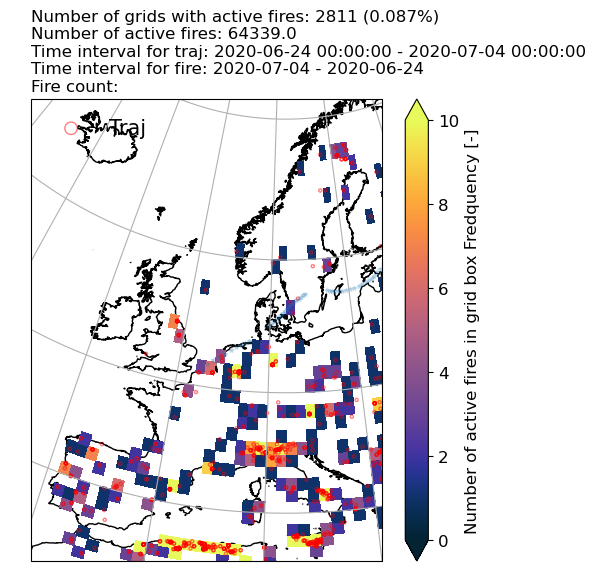

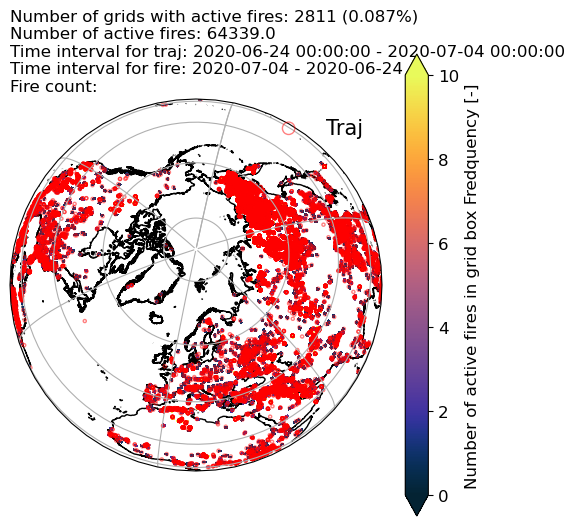

(<Figure size 600x600 with 3 Axes>, <Figure size 600x600 with 3 Axes>)

In [12]:
fu_fire.example_plots(df_fire_2020, trajs_dictionary_2020, '2020-07-04 00:00:00')

# Process the active fires with trajectories for selected years: 

Here, is where we do all the processing in a loop - year by year

In [74]:
fu_fire.process_data(fire_path='C:\\Users\\DominicHeslinRees\\Documents\\Data\\NASA_FIRE\\MODIS\\', 
                     df_obs=df_abs637, 
                     outpath_datafiles='C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\Analysis\\fire_datasets\\', 
                     process=True, 
                     years=[2022, 2023], inpath_processed_hysplit_dfs="F:\\HYSPLIT\\processed\\") #saved up to 202X

files: 1


C:\Users\DominicHeslinRees\Documents\GitHub\Active-fire-count\active_fire_count_functions.py:371: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  df_fire = load_fire_data_for_year(fire_path, year=year) #fire dataset from NASA


Year: 2023
Path: F:\HYSPLIT\processed\2023\
Number of HYSPLIT files for 2023: 7629
index of df used:
Matching files from observational data & HYSPLIT: 2552
mixed layer selected
arrival time: 2023-03-27 05:00:00
arrival time: 2023-03-27 06:00:00
arrival time: 2023-03-27 07:00:00
arrival time: 2023-01-01 00:00:00
arrival time: 2023-01-01 01:00:00
arrival time: 2023-01-01 02:00:00
arrival time: 2023-01-01 03:00:00
arrival time: 2023-01-01 04:00:00
arrival time: 2023-01-01 05:00:00
arrival time: 2023-01-01 06:00:00
arrival time: 2023-01-01 07:00:00
arrival time: 2023-01-01 08:00:00
arrival time: 2023-01-01 09:00:00
arrival time: 2023-01-01 10:00:00
arrival time: 2023-01-01 11:00:00
arrival time: 2023-01-01 12:00:00
arrival time: 2023-01-01 13:00:00
arrival time: 2023-01-01 14:00:00
arrival time: 2023-01-01 15:00:00
arrival time: 2023-01-01 16:00:00
arrival time: 2023-01-01 17:00:00
arrival time: 2023-01-01 18:00:00
arrival time: 2023-01-01 19:00:00
arrival time: 2023-01-01 20:00:00
arrival

arrival time: 2023-01-11 03:00:00
arrival time: 2023-01-11 04:00:00
arrival time: 2023-01-11 05:00:00
arrival time: 2023-01-11 06:00:00
arrival time: 2023-01-11 07:00:00
arrival time: 2023-01-11 08:00:00
arrival time: 2023-01-11 09:00:00
arrival time: 2023-01-11 10:00:00
arrival time: 2023-01-11 11:00:00
arrival time: 2023-01-11 12:00:00
arrival time: 2023-01-11 13:00:00
arrival time: 2023-01-11 14:00:00
arrival time: 2023-01-11 15:00:00
arrival time: 2023-01-11 16:00:00
arrival time: 2023-01-11 17:00:00
arrival time: 2023-01-11 18:00:00
arrival time: 2023-01-11 19:00:00
arrival time: 2023-01-11 20:00:00
arrival time: 2023-01-11 21:00:00
arrival time: 2023-01-11 22:00:00
arrival time: 2023-01-11 23:00:00
arrival time: 2023-01-12 00:00:00
arrival time: 2023-01-12 01:00:00
arrival time: 2023-01-12 02:00:00
arrival time: 2023-01-12 03:00:00
arrival time: 2023-01-12 04:00:00
arrival time: 2023-01-12 05:00:00
arrival time: 2023-01-12 06:00:00
arrival time: 2023-01-12 07:00:00
arrival time: 

arrival time: 2023-01-22 00:00:00
arrival time: 2023-01-22 01:00:00
arrival time: 2023-01-22 02:00:00
arrival time: 2023-01-22 03:00:00
arrival time: 2023-01-22 04:00:00
arrival time: 2023-01-22 05:00:00
arrival time: 2023-01-22 06:00:00
arrival time: 2023-01-22 07:00:00
arrival time: 2023-01-22 08:00:00
arrival time: 2023-01-22 09:00:00
arrival time: 2023-01-22 10:00:00
arrival time: 2023-01-22 11:00:00
arrival time: 2023-01-22 12:00:00
arrival time: 2023-01-22 13:00:00
arrival time: 2023-01-22 14:00:00
arrival time: 2023-01-22 15:00:00
arrival time: 2023-01-22 16:00:00
arrival time: 2023-01-22 17:00:00
arrival time: 2023-01-22 18:00:00
arrival time: 2023-01-22 19:00:00
arrival time: 2023-01-22 20:00:00
arrival time: 2023-01-22 21:00:00
arrival time: 2023-01-22 22:00:00
arrival time: 2023-01-22 23:00:00
arrival time: 2023-01-23 00:00:00
arrival time: 2023-01-23 01:00:00
arrival time: 2023-01-23 02:00:00
arrival time: 2023-01-23 03:00:00
arrival time: 2023-01-23 04:00:00
arrival time: 

arrival time: 2023-02-01 11:00:00
arrival time: 2023-02-01 12:00:00
arrival time: 2023-02-01 13:00:00
arrival time: 2023-02-01 14:00:00
arrival time: 2023-02-01 15:00:00
arrival time: 2023-02-01 16:00:00
arrival time: 2023-02-01 17:00:00
arrival time: 2023-02-01 18:00:00
arrival time: 2023-02-01 19:00:00
arrival time: 2023-02-01 20:00:00
arrival time: 2023-02-01 21:00:00
arrival time: 2023-02-01 22:00:00
arrival time: 2023-02-01 23:00:00
arrival time: 2023-02-02 00:00:00
arrival time: 2023-02-02 01:00:00
arrival time: 2023-02-02 02:00:00
arrival time: 2023-02-02 03:00:00
arrival time: 2023-02-02 04:00:00
arrival time: 2023-02-02 05:00:00
arrival time: 2023-02-02 06:00:00
arrival time: 2023-02-02 07:00:00
arrival time: 2023-02-02 08:00:00
arrival time: 2023-02-02 09:00:00
arrival time: 2023-02-02 10:00:00
arrival time: 2023-02-02 11:00:00
arrival time: 2023-02-02 12:00:00
arrival time: 2023-02-02 13:00:00
arrival time: 2023-02-02 14:00:00
arrival time: 2023-02-02 15:00:00
arrival time: 

arrival time: 2023-02-11 18:00:00
arrival time: 2023-02-11 19:00:00
arrival time: 2023-02-11 20:00:00
arrival time: 2023-02-11 21:00:00
arrival time: 2023-02-11 22:00:00
arrival time: 2023-02-11 23:00:00
arrival time: 2023-02-12 00:00:00
arrival time: 2023-02-12 01:00:00
arrival time: 2023-02-12 02:00:00
arrival time: 2023-02-12 03:00:00
arrival time: 2023-02-12 04:00:00
arrival time: 2023-02-12 05:00:00
arrival time: 2023-02-12 06:00:00
arrival time: 2023-02-12 07:00:00
arrival time: 2023-02-12 08:00:00
arrival time: 2023-02-12 09:00:00
arrival time: 2023-02-12 10:00:00
arrival time: 2023-02-12 11:00:00
arrival time: 2023-02-12 12:00:00
arrival time: 2023-02-12 13:00:00
arrival time: 2023-02-12 14:00:00
arrival time: 2023-02-12 15:00:00
arrival time: 2023-02-12 16:00:00
arrival time: 2023-02-12 17:00:00
arrival time: 2023-02-12 18:00:00
arrival time: 2023-02-12 19:00:00
arrival time: 2023-02-12 20:00:00
arrival time: 2023-02-12 21:00:00
arrival time: 2023-02-12 22:00:00
arrival time: 

arrival time: 2023-02-22 02:00:00
arrival time: 2023-02-22 03:00:00
arrival time: 2023-02-22 04:00:00
arrival time: 2023-02-22 05:00:00
arrival time: 2023-02-22 06:00:00
arrival time: 2023-02-22 07:00:00
arrival time: 2023-02-22 08:00:00
arrival time: 2023-02-22 09:00:00
arrival time: 2023-02-22 10:00:00
arrival time: 2023-02-22 11:00:00
arrival time: 2023-02-22 12:00:00
arrival time: 2023-02-22 13:00:00
arrival time: 2023-02-22 14:00:00
arrival time: 2023-02-22 15:00:00
arrival time: 2023-02-22 16:00:00
arrival time: 2023-02-22 17:00:00
arrival time: 2023-02-22 18:00:00
arrival time: 2023-02-22 19:00:00
arrival time: 2023-02-22 20:00:00
arrival time: 2023-02-22 21:00:00
arrival time: 2023-02-22 22:00:00
arrival time: 2023-02-22 23:00:00
arrival time: 2023-02-23 00:00:00
arrival time: 2023-02-23 01:00:00
arrival time: 2023-02-23 02:00:00
arrival time: 2023-02-23 03:00:00
arrival time: 2023-02-23 04:00:00
arrival time: 2023-02-23 05:00:00
arrival time: 2023-02-23 06:00:00
arrival time: 

arrival time: 2023-03-04 11:00:00
arrival time: 2023-03-04 12:00:00
arrival time: 2023-03-04 13:00:00
arrival time: 2023-03-04 14:00:00
arrival time: 2023-03-04 15:00:00
arrival time: 2023-03-04 16:00:00
arrival time: 2023-03-04 17:00:00
arrival time: 2023-03-04 18:00:00
arrival time: 2023-03-04 19:00:00
arrival time: 2023-03-04 20:00:00
arrival time: 2023-03-04 21:00:00
arrival time: 2023-03-04 22:00:00
arrival time: 2023-03-04 23:00:00
arrival time: 2023-03-05 00:00:00
arrival time: 2023-03-05 01:00:00
arrival time: 2023-03-05 02:00:00
arrival time: 2023-03-05 03:00:00
arrival time: 2023-03-05 04:00:00
arrival time: 2023-03-05 05:00:00
arrival time: 2023-03-05 06:00:00
arrival time: 2023-03-05 07:00:00
arrival time: 2023-03-05 08:00:00
arrival time: 2023-03-05 09:00:00
arrival time: 2023-03-05 10:00:00
arrival time: 2023-03-05 11:00:00
arrival time: 2023-03-05 12:00:00
arrival time: 2023-03-05 13:00:00
arrival time: 2023-03-05 14:00:00
arrival time: 2023-03-05 15:00:00
arrival time: 

arrival time: 2023-03-14 19:00:00
arrival time: 2023-03-14 20:00:00
arrival time: 2023-03-14 21:00:00
arrival time: 2023-03-14 22:00:00
arrival time: 2023-03-14 23:00:00
arrival time: 2023-03-15 00:00:00
arrival time: 2023-03-15 01:00:00
arrival time: 2023-03-15 02:00:00
arrival time: 2023-03-15 03:00:00
arrival time: 2023-03-15 04:00:00
arrival time: 2023-03-15 05:00:00
arrival time: 2023-03-15 06:00:00
arrival time: 2023-03-15 07:00:00
arrival time: 2023-03-15 08:00:00
arrival time: 2023-03-15 09:00:00
arrival time: 2023-03-15 10:00:00
arrival time: 2023-03-15 11:00:00
arrival time: 2023-03-15 12:00:00
arrival time: 2023-03-15 13:00:00
arrival time: 2023-03-15 14:00:00
arrival time: 2023-03-15 15:00:00
arrival time: 2023-03-15 16:00:00
arrival time: 2023-03-15 17:00:00
arrival time: 2023-03-15 18:00:00
arrival time: 2023-03-15 19:00:00
arrival time: 2023-03-15 20:00:00
arrival time: 2023-03-15 21:00:00
arrival time: 2023-03-15 22:00:00
arrival time: 2023-03-15 23:00:00
arrival time: 

arrival time: 2023-03-25 14:00:00
arrival time: 2023-03-25 15:00:00
arrival time: 2023-03-25 16:00:00
arrival time: 2023-03-25 17:00:00
arrival time: 2023-03-25 18:00:00
arrival time: 2023-03-25 19:00:00
arrival time: 2023-03-25 20:00:00
arrival time: 2023-03-25 21:00:00
arrival time: 2023-03-25 22:00:00
arrival time: 2023-03-25 23:00:00
arrival time: 2023-03-26 00:00:00
arrival time: 2023-03-26 01:00:00
arrival time: 2023-03-26 02:00:00
arrival time: 2023-03-26 03:00:00
arrival time: 2023-03-26 04:00:00
arrival time: 2023-03-26 05:00:00
arrival time: 2023-03-26 06:00:00
arrival time: 2023-03-26 07:00:00
arrival time: 2023-03-26 08:00:00
arrival time: 2023-03-26 09:00:00
arrival time: 2023-03-26 10:00:00
arrival time: 2023-03-26 11:00:00
arrival time: 2023-03-26 12:00:00
arrival time: 2023-03-26 13:00:00
arrival time: 2023-03-26 14:00:00
arrival time: 2023-03-26 15:00:00
arrival time: 2023-03-26 16:00:00
arrival time: 2023-03-26 17:00:00
arrival time: 2023-03-26 18:00:00
arrival time: 

arrival time: 2023-04-04 20:00:00
arrival time: 2023-04-04 21:00:00
arrival time: 2023-04-04 22:00:00
arrival time: 2023-04-04 23:00:00
arrival time: 2023-04-05 00:00:00
arrival time: 2023-04-05 01:00:00
arrival time: 2023-04-05 02:00:00
arrival time: 2023-04-05 03:00:00
arrival time: 2023-04-05 04:00:00
arrival time: 2023-04-05 05:00:00
arrival time: 2023-04-05 06:00:00
arrival time: 2023-04-05 07:00:00
arrival time: 2023-04-05 08:00:00
arrival time: 2023-04-05 09:00:00
arrival time: 2023-04-05 10:00:00
arrival time: 2023-04-05 11:00:00
arrival time: 2023-04-05 12:00:00
arrival time: 2023-04-05 13:00:00
arrival time: 2023-04-05 14:00:00
arrival time: 2023-04-05 15:00:00
arrival time: 2023-04-05 16:00:00
arrival time: 2023-04-05 17:00:00
arrival time: 2023-04-05 18:00:00
arrival time: 2023-04-05 19:00:00
arrival time: 2023-04-05 20:00:00
arrival time: 2023-04-05 21:00:00
arrival time: 2023-04-05 22:00:00
arrival time: 2023-04-05 23:00:00
arrival time: 2023-04-06 00:00:00
arrival time: 

arrival time: 2023-04-15 23:00:00
arrival time: 2023-04-16 00:00:00
arrival time: 2023-04-16 01:00:00
arrival time: 2023-04-16 02:00:00
arrival time: 2023-04-16 03:00:00
arrival time: 2023-04-16 04:00:00
arrival time: 2023-04-16 05:00:00
arrival time: 2023-04-16 06:00:00
arrival time: 2023-04-16 07:00:00
arrival time: 2023-04-16 08:00:00
arrival time: 2023-04-16 09:00:00
arrival time: 2023-04-16 10:00:00
arrival time: 2023-04-16 11:00:00
arrival time: 2023-04-16 12:00:00
arrival time: 2023-04-16 13:00:00
arrival time: 2023-04-16 14:00:00
arrival time: 2023-04-16 15:00:00
arrival time: 2023-04-16 16:00:00
arrival time: 2023-04-16 17:00:00
arrival time: 2023-04-16 18:00:00
arrival time: 2023-04-16 19:00:00
arrival time: 2023-04-16 20:00:00
arrival time: 2023-04-16 21:00:00
arrival time: 2023-04-16 22:00:00
arrival time: 2023-04-16 23:00:00
arrival time: 2023-04-17 00:00:00
arrival time: 2023-04-17 01:00:00
arrival time: 2023-04-17 02:00:00
arrival time: 2023-04-17 03:00:00
arrival time: 

arrival_time: 2023-01-06 02:00:00
size of df fire 62429
arrival_time: 2023-01-06 03:00:00
size of df fire 62429
arrival_time: 2023-01-06 04:00:00
size of df fire 62429
arrival_time: 2023-01-06 05:00:00
size of df fire 62429
arrival_time: 2023-01-06 06:00:00
size of df fire 62429
arrival_time: 2023-01-06 07:00:00
size of df fire 62429
arrival_time: 2023-01-06 08:00:00
size of df fire 62429
arrival_time: 2023-01-06 09:00:00
size of df fire 62429
arrival_time: 2023-01-06 10:00:00
size of df fire 62429
arrival_time: 2023-01-06 11:00:00
size of df fire 62429
arrival_time: 2023-01-06 12:00:00
size of df fire 62429
arrival_time: 2023-01-06 13:00:00
size of df fire 62429
arrival_time: 2023-01-06 14:00:00
size of df fire 62429
arrival_time: 2023-01-06 15:00:00
size of df fire 62429
arrival_time: 2023-01-06 16:00:00
size of df fire 62429
arrival_time: 2023-01-06 17:00:00
size of df fire 62429
arrival_time: 2023-01-06 18:00:00
size of df fire 62429
arrival_time: 2023-01-06 19:00:00
size of df fir

arrival_time: 2023-01-12 04:00:00
size of df fire 117047
arrival_time: 2023-01-12 05:00:00
size of df fire 117047
arrival_time: 2023-01-12 06:00:00
size of df fire 117047
arrival_time: 2023-01-12 07:00:00
size of df fire 117047
arrival_time: 2023-01-12 08:00:00
size of df fire 117047
arrival_time: 2023-01-12 09:00:00
size of df fire 117047
arrival_time: 2023-01-12 10:00:00
size of df fire 107963
arrival_time: 2023-01-12 11:00:00
size of df fire 117047
arrival_time: 2023-01-12 12:00:00
size of df fire 117047
arrival_time: 2023-01-12 13:00:00
size of df fire 117047
arrival_time: 2023-01-12 14:00:00
size of df fire 117047
arrival_time: 2023-01-12 15:00:00
size of df fire 117047
arrival_time: 2023-01-12 16:00:00
size of df fire 117047
arrival_time: 2023-01-12 17:00:00
size of df fire 117047
arrival_time: 2023-01-12 18:00:00
size of df fire 117047
arrival_time: 2023-01-12 19:00:00
size of df fire 117047
arrival_time: 2023-01-12 20:00:00
size of df fire 117047
arrival_time: 2023-01-12 21:00:

arrival_time: 2023-01-18 04:00:00
size of df fire 112120
arrival_time: 2023-01-18 05:00:00
size of df fire 112120
arrival_time: 2023-01-18 06:00:00
size of df fire 112120
arrival_time: 2023-01-18 07:00:00
size of df fire 112120
arrival_time: 2023-01-18 08:00:00
size of df fire 112120
arrival_time: 2023-01-18 09:00:00
size of df fire 112120
arrival_time: 2023-01-18 10:00:00
size of df fire 112120
arrival_time: 2023-01-18 11:00:00
size of df fire 112120
arrival_time: 2023-01-18 12:00:00
size of df fire 112120
arrival_time: 2023-01-18 13:00:00
size of df fire 112120
arrival_time: 2023-01-18 14:00:00
size of df fire 112120
arrival_time: 2023-01-18 15:00:00
size of df fire 112120
arrival_time: 2023-01-18 16:00:00
size of df fire 112120
arrival_time: 2023-01-18 17:00:00
size of df fire 112120
arrival_time: 2023-01-18 18:00:00
size of df fire 112120
arrival_time: 2023-01-18 19:00:00
size of df fire 112120
arrival_time: 2023-01-18 20:00:00
size of df fire 112120
arrival_time: 2023-01-18 21:00:

arrival_time: 2023-01-24 06:00:00
size of df fire 98098
arrival_time: 2023-01-24 07:00:00
size of df fire 98098
arrival_time: 2023-01-24 08:00:00
size of df fire 98098
arrival_time: 2023-01-24 09:00:00
size of df fire 98098
arrival_time: 2023-01-24 10:00:00
size of df fire 98098
arrival_time: 2023-01-24 11:00:00
size of df fire 98098
arrival_time: 2023-01-24 12:00:00
size of df fire 98098
arrival_time: 2023-01-24 13:00:00
size of df fire 98098
arrival_time: 2023-01-24 14:00:00
size of df fire 98098
arrival_time: 2023-01-24 15:00:00
size of df fire 98098
arrival_time: 2023-01-24 16:00:00
size of df fire 98098
arrival_time: 2023-01-24 17:00:00
size of df fire 98098
arrival_time: 2023-01-24 18:00:00
size of df fire 98098
arrival_time: 2023-01-24 19:00:00
size of df fire 98098
arrival_time: 2023-01-24 20:00:00
size of df fire 98098
arrival_time: 2023-01-24 21:00:00
size of df fire 98098
arrival_time: 2023-01-24 22:00:00
size of df fire 98098
arrival_time: 2023-01-24 23:00:00
size of df fir

arrival_time: 2023-01-30 09:00:00
size of df fire 85549
arrival_time: 2023-01-30 10:00:00
size of df fire 85549
arrival_time: 2023-01-30 11:00:00
size of df fire 75654
arrival_time: 2023-01-30 12:00:00
size of df fire 85549
arrival_time: 2023-01-30 13:00:00
size of df fire 85549
arrival_time: 2023-01-30 14:00:00
size of df fire 85549
arrival_time: 2023-01-30 15:00:00
size of df fire 85549
arrival_time: 2023-01-30 16:00:00
size of df fire 85549
arrival_time: 2023-01-30 17:00:00
size of df fire 85549
arrival_time: 2023-01-30 18:00:00
size of df fire 85549
arrival_time: 2023-01-30 19:00:00
size of df fire 85549
arrival_time: 2023-01-30 20:00:00
size of df fire 85549
arrival_time: 2023-01-30 21:00:00
size of df fire 85549
arrival_time: 2023-01-30 22:00:00
size of df fire 85549
arrival_time: 2023-01-30 23:00:00
size of df fire 85549
arrival_time: 2023-01-31 00:00:00
size of df fire 86813
arrival_time: 2023-01-31 01:00:00
size of df fire 86813
arrival_time: 2023-01-31 02:00:00
size of df fir

arrival_time: 2023-02-05 12:00:00
size of df fire 97633
arrival_time: 2023-02-05 13:00:00
size of df fire 97633
arrival_time: 2023-02-05 14:00:00
size of df fire 97633
arrival_time: 2023-02-05 15:00:00
size of df fire 97633
arrival_time: 2023-02-05 16:00:00
size of df fire 97633
arrival_time: 2023-02-05 17:00:00
size of df fire 97633
arrival_time: 2023-02-05 18:00:00
size of df fire 97633
arrival_time: 2023-02-05 19:00:00
size of df fire 97633
arrival_time: 2023-02-05 20:00:00
size of df fire 97633
arrival_time: 2023-02-05 21:00:00
size of df fire 97633
arrival_time: 2023-02-05 22:00:00
size of df fire 97633
arrival_time: 2023-02-05 23:00:00
size of df fire 97633
arrival_time: 2023-02-06 00:00:00
size of df fire 100820
arrival_time: 2023-02-06 01:00:00
size of df fire 100820
arrival_time: 2023-02-06 02:00:00
size of df fire 100820
arrival_time: 2023-02-06 03:00:00
size of df fire 100820
arrival_time: 2023-02-06 04:00:00
size of df fire 100820
arrival_time: 2023-02-06 05:00:00
size of d

arrival_time: 2023-02-11 12:00:00
size of df fire 104393
arrival_time: 2023-02-11 13:00:00
size of df fire 104393
arrival_time: 2023-02-11 14:00:00
size of df fire 104393
arrival_time: 2023-02-11 15:00:00
size of df fire 104393
arrival_time: 2023-02-11 16:00:00
size of df fire 104393
arrival_time: 2023-02-11 17:00:00
size of df fire 104393
arrival_time: 2023-02-11 18:00:00
size of df fire 104393
arrival_time: 2023-02-11 19:00:00
size of df fire 104393
arrival_time: 2023-02-11 20:00:00
size of df fire 104393
arrival_time: 2023-02-11 21:00:00
size of df fire 104393
arrival_time: 2023-02-11 22:00:00
size of df fire 104393
arrival_time: 2023-02-11 23:00:00
size of df fire 104393
arrival_time: 2023-02-12 00:00:00
size of df fire 107310
arrival_time: 2023-02-12 01:00:00
size of df fire 107310
arrival_time: 2023-02-12 02:00:00
size of df fire 107310
arrival_time: 2023-02-12 03:00:00
size of df fire 107310
arrival_time: 2023-02-12 04:00:00
size of df fire 107310
arrival_time: 2023-02-12 05:00:

arrival_time: 2023-02-17 12:00:00
size of df fire 121177
arrival_time: 2023-02-17 13:00:00
size of df fire 121177
arrival_time: 2023-02-17 14:00:00
size of df fire 121177
arrival_time: 2023-02-17 15:00:00
size of df fire 121177
arrival_time: 2023-02-17 16:00:00
size of df fire 121177
arrival_time: 2023-02-17 17:00:00
size of df fire 90404
arrival_time: 2023-02-17 18:00:00
size of df fire 90404
arrival_time: 2023-02-17 19:00:00
size of df fire 121177
arrival_time: 2023-02-17 20:00:00
size of df fire 121177
arrival_time: 2023-02-17 21:00:00
size of df fire 121177
arrival_time: 2023-02-17 22:00:00
size of df fire 121177
arrival_time: 2023-02-17 23:00:00
size of df fire 121177
arrival_time: 2023-02-18 00:00:00
size of df fire 123862
arrival_time: 2023-02-18 01:00:00
size of df fire 123862
arrival_time: 2023-02-18 02:00:00
size of df fire 123862
arrival_time: 2023-02-18 03:00:00
size of df fire 123862
arrival_time: 2023-02-18 04:00:00
size of df fire 123862
arrival_time: 2023-02-18 05:00:00

arrival_time: 2023-02-23 13:00:00
size of df fire 126595
arrival_time: 2023-02-23 14:00:00
size of df fire 126595
arrival_time: 2023-02-23 15:00:00
size of df fire 126595
arrival_time: 2023-02-23 16:00:00
size of df fire 126595
arrival_time: 2023-02-23 17:00:00
size of df fire 126595
arrival_time: 2023-02-23 18:00:00
size of df fire 126595
arrival_time: 2023-02-23 19:00:00
size of df fire 126595
arrival_time: 2023-02-23 20:00:00
size of df fire 126595
arrival_time: 2023-02-23 21:00:00
size of df fire 126595
arrival_time: 2023-02-23 22:00:00
size of df fire 126595
arrival_time: 2023-02-23 23:00:00
size of df fire 126595
arrival_time: 2023-02-24 00:00:00
size of df fire 122070
arrival_time: 2023-02-24 01:00:00
size of df fire 122070
arrival_time: 2023-02-24 02:00:00
size of df fire 122070
arrival_time: 2023-02-24 03:00:00
size of df fire 122070
arrival_time: 2023-02-24 04:00:00
size of df fire 122070
arrival_time: 2023-02-24 05:00:00
size of df fire 122070
arrival_time: 2023-02-24 06:00:

arrival_time: 2023-03-01 13:00:00
size of df fire 72183
arrival_time: 2023-03-01 14:00:00
size of df fire 72183
arrival_time: 2023-03-01 15:00:00
size of df fire 72183
arrival_time: 2023-03-01 16:00:00
size of df fire 72183
arrival_time: 2023-03-01 17:00:00
size of df fire 72183
arrival_time: 2023-03-01 18:00:00
size of df fire 72183
arrival_time: 2023-03-01 19:00:00
size of df fire 72183
arrival_time: 2023-03-01 20:00:00
size of df fire 72183
arrival_time: 2023-03-01 21:00:00
size of df fire 72183
arrival_time: 2023-03-01 22:00:00
size of df fire 72183
arrival_time: 2023-03-01 23:00:00
size of df fire 72183
arrival_time: 2023-03-02 00:00:00
size of df fire 81814
arrival_time: 2023-03-02 01:00:00
size of df fire 81814
arrival_time: 2023-03-02 02:00:00
size of df fire 81814
arrival_time: 2023-03-02 03:00:00
size of df fire 81814
arrival_time: 2023-03-02 04:00:00
size of df fire 81814
arrival_time: 2023-03-02 05:00:00
size of df fire 81814
arrival_time: 2023-03-02 06:00:00
size of df fir

arrival_time: 2023-03-07 15:00:00
size of df fire 100309
arrival_time: 2023-03-07 16:00:00
size of df fire 72835
arrival_time: 2023-03-07 17:00:00
size of df fire 100309
arrival_time: 2023-03-07 18:00:00
size of df fire 100309
arrival_time: 2023-03-07 19:00:00
size of df fire 100309
arrival_time: 2023-03-07 20:00:00
size of df fire 100309
arrival_time: 2023-03-07 21:00:00
size of df fire 90673
arrival_time: 2023-03-07 22:00:00
size of df fire 72835
arrival_time: 2023-03-07 23:00:00
size of df fire 90673
arrival_time: 2023-03-08 00:00:00
size of df fire 96354
arrival_time: 2023-03-08 01:00:00
size of df fire 96354
arrival_time: 2023-03-08 02:00:00
size of df fire 96354
arrival_time: 2023-03-08 03:00:00
size of df fire 96354
arrival_time: 2023-03-08 04:00:00
size of df fire 96354
arrival_time: 2023-03-08 05:00:00
size of df fire 96354
arrival_time: 2023-03-08 06:00:00
size of df fire 96354
arrival_time: 2023-03-08 07:00:00
size of df fire 96354
arrival_time: 2023-03-08 08:00:00
size of d

arrival_time: 2023-03-13 18:00:00
size of df fire 81776
arrival_time: 2023-03-13 19:00:00
size of df fire 81776
arrival_time: 2023-03-13 20:00:00
size of df fire 81776
arrival_time: 2023-03-13 21:00:00
size of df fire 81776
arrival_time: 2023-03-13 22:00:00
size of df fire 81776
arrival_time: 2023-03-13 23:00:00
size of df fire 81776
arrival_time: 2023-03-14 00:00:00
size of df fire 81530
arrival_time: 2023-03-14 01:00:00
size of df fire 81530
arrival_time: 2023-03-14 02:00:00
size of df fire 81530
arrival_time: 2023-03-14 03:00:00
size of df fire 81530
arrival_time: 2023-03-14 04:00:00
size of df fire 81530
arrival_time: 2023-03-14 05:00:00
size of df fire 81530
arrival_time: 2023-03-14 06:00:00
size of df fire 81530
arrival_time: 2023-03-14 07:00:00
size of df fire 81530
arrival_time: 2023-03-14 08:00:00
size of df fire 81530
arrival_time: 2023-03-14 09:00:00
size of df fire 81530
arrival_time: 2023-03-14 10:00:00
size of df fire 81530
arrival_time: 2023-03-14 11:00:00
size of df fir

arrival_time: 2023-03-19 21:00:00
size of df fire 69710
arrival_time: 2023-03-19 22:00:00
size of df fire 69710
arrival_time: 2023-03-19 23:00:00
size of df fire 69710
arrival_time: 2023-03-20 00:00:00
size of df fire 71549
arrival_time: 2023-03-20 01:00:00
size of df fire 71549
arrival_time: 2023-03-20 02:00:00
size of df fire 71549
arrival_time: 2023-03-20 03:00:00
size of df fire 71549
arrival_time: 2023-03-20 04:00:00
size of df fire 71549
arrival_time: 2023-03-20 05:00:00
size of df fire 71549
arrival_time: 2023-03-20 06:00:00
size of df fire 71549
arrival_time: 2023-03-20 07:00:00
size of df fire 71549
arrival_time: 2023-03-20 08:00:00
size of df fire 71549
arrival_time: 2023-03-20 09:00:00
size of df fire 71549
arrival_time: 2023-03-20 10:00:00
size of df fire 71549
arrival_time: 2023-03-20 11:00:00
size of df fire 71549
arrival_time: 2023-03-20 12:00:00
size of df fire 71549
arrival_time: 2023-03-20 13:00:00
size of df fire 71549
arrival_time: 2023-03-20 14:00:00
size of df fir

arrival_time: 2023-03-26 02:00:00
size of df fire 85911
arrival_time: 2023-03-26 03:00:00
size of df fire 85911
arrival_time: 2023-03-26 04:00:00
size of df fire 85911
arrival_time: 2023-03-26 05:00:00
size of df fire 85911
arrival_time: 2023-03-26 06:00:00
size of df fire 85911
arrival_time: 2023-03-26 07:00:00
size of df fire 85911
arrival_time: 2023-03-26 08:00:00
size of df fire 85911
arrival_time: 2023-03-26 09:00:00
size of df fire 85911
arrival_time: 2023-03-26 10:00:00
size of df fire 85911
arrival_time: 2023-03-26 11:00:00
size of df fire 85911
arrival_time: 2023-03-26 12:00:00
size of df fire 85911
arrival_time: 2023-03-26 13:00:00
size of df fire 85911
arrival_time: 2023-03-26 14:00:00
size of df fire 85911
arrival_time: 2023-03-26 15:00:00
size of df fire 85911
arrival_time: 2023-03-26 16:00:00
size of df fire 85911
arrival_time: 2023-03-26 17:00:00
size of df fire 85911
arrival_time: 2023-03-26 18:00:00
size of df fire 85911
arrival_time: 2023-03-26 19:00:00
size of df fir

arrival_time: 2023-04-01 08:00:00
size of df fire 99187
arrival_time: 2023-04-01 09:00:00
size of df fire 99187
arrival_time: 2023-04-01 10:00:00
size of df fire 92401
arrival_time: 2023-04-01 11:00:00
size of df fire 99187
arrival_time: 2023-04-01 12:00:00
size of df fire 99187
arrival_time: 2023-04-01 13:00:00
size of df fire 99187
arrival_time: 2023-04-01 14:00:00
size of df fire 99187
arrival_time: 2023-04-01 15:00:00
size of df fire 99187
arrival_time: 2023-04-01 16:00:00
size of df fire 99187
arrival_time: 2023-04-01 17:00:00
size of df fire 99187
arrival_time: 2023-04-01 18:00:00
size of df fire 99187
arrival_time: 2023-04-01 19:00:00
size of df fire 99187
arrival_time: 2023-04-01 20:00:00
size of df fire 99187
arrival_time: 2023-04-01 21:00:00
size of df fire 82095
arrival_time: 2023-04-01 22:00:00
size of df fire 92401
arrival_time: 2023-04-01 23:00:00
size of df fire 99187
arrival_time: 2023-04-02 00:00:00
size of df fire 100592
arrival_time: 2023-04-02 01:00:00
size of df fi

arrival_time: 2023-04-07 10:00:00
size of df fire 101289
arrival_time: 2023-04-07 11:00:00
size of df fire 101289
arrival_time: 2023-04-07 12:00:00
size of df fire 101289
arrival_time: 2023-04-07 13:00:00
size of df fire 101289
arrival_time: 2023-04-07 14:00:00
size of df fire 101289
arrival_time: 2023-04-07 15:00:00
size of df fire 101289
arrival_time: 2023-04-07 16:00:00
size of df fire 101289
arrival_time: 2023-04-07 17:00:00
size of df fire 101289
arrival_time: 2023-04-07 18:00:00
size of df fire 101289
arrival_time: 2023-04-07 19:00:00
size of df fire 101289
arrival_time: 2023-04-07 20:00:00
size of df fire 101289
arrival_time: 2023-04-07 21:00:00
size of df fire 101289
arrival_time: 2023-04-07 22:00:00
size of df fire 101289
arrival_time: 2023-04-07 23:00:00
size of df fire 101289
arrival_time: 2023-04-08 00:00:00
size of df fire 101981
arrival_time: 2023-04-08 01:00:00
size of df fire 101981
arrival_time: 2023-04-08 02:00:00
size of df fire 101981
arrival_time: 2023-04-08 03:00:

arrival_time: 2023-04-13 10:00:00
size of df fire 114867
arrival_time: 2023-04-13 11:00:00
size of df fire 114867
arrival_time: 2023-04-13 12:00:00
size of df fire 114867
arrival_time: 2023-04-13 13:00:00
size of df fire 114867
arrival_time: 2023-04-13 14:00:00
size of df fire 114867
arrival_time: 2023-04-13 15:00:00
size of df fire 114867
arrival_time: 2023-04-13 16:00:00
size of df fire 114867
arrival_time: 2023-04-13 17:00:00
size of df fire 114867
arrival_time: 2023-04-13 18:00:00
size of df fire 114867
arrival_time: 2023-04-13 19:00:00
size of df fire 114867
arrival_time: 2023-04-13 20:00:00
size of df fire 114867
arrival_time: 2023-04-13 21:00:00
size of df fire 114867
arrival_time: 2023-04-13 22:00:00
size of df fire 114867
arrival_time: 2023-04-13 23:00:00
size of df fire 114867
arrival_time: 2023-04-14 00:00:00
size of df fire 116044
arrival_time: 2023-04-14 01:00:00
size of df fire 116044
arrival_time: 2023-04-14 02:00:00
size of df fire 116044
arrival_time: 2023-04-14 03:00:

# Load: 

In [11]:
df_traj_fire_count_2023 =  fu_fire.load_df(r'C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\Analysis\\fire_datasets\\',
                                           filename='2023')

loading: C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\Analysis\\fire_datasets\\\2023.dat


In [12]:
df_traj_fire_count_2023

fire_count  unique_grid_count  total_grid_count
arrival_time                                                        
2023-01-01 00:00:00         3.0                830              1816
2023-01-01 01:00:00         2.0                668              1702
2023-01-01 02:00:00         1.0                794              1968
2023-01-01 03:00:00         0.0                707              1942
2023-01-01 04:00:00         1.0                650              1801
...                         ...                ...               ...
2023-02-10 20:00:00         1.0               1021              1827
2023-02-10 21:00:00         0.0                968              1848
2023-02-10 22:00:00         0.0               1073              1932
2023-02-10 23:00:00         0.0               1133              2076
2023-01-20 23:00:00       150.0               1214              2614

[984 rows x 3 columns]

## Concat processed files:

In [5]:
df_fire_count = fu_fire.append_dfs('C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\Analysis\\fire_datasets\\')

file: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\fire_datasets\2002.dat
file: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\fire_datasets\2003.dat
file: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\fire_datasets\2004.dat
file: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\fire_datasets\2005.dat
file: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\fire_datasets\2006.dat
file: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\fire_datasets\2007.dat
file: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\fire_datasets\2008.dat
file: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\fire_datasets\2009.dat
file: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\fire_datasets\2010.dat
file: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\fire_datasets\2011.dat
file: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\fire_datasets\2012.dat
file: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\fire_datasets\2

In [6]:
df_fire_count.head(2)

fire_count  unique_grid_count  total_grid_count
arrival_time                                                        
2002-03-08 14:00:00         2.0              320.0            1420.0
2002-03-08 15:00:00         0.0              267.0             784.0

In [7]:
df_fire_count = df_fire_count.sort_index()

In [8]:
df_fire_count

fire_count  unique_grid_count  total_grid_count
arrival_time                                                        
2002-03-08 14:00:00         2.0              320.0            1420.0
2002-03-08 15:00:00         0.0              267.0             784.0
2002-03-08 16:00:00         8.0              196.0             623.0
2002-03-08 17:00:00        21.0              177.0            1104.0
2002-03-08 18:00:00         0.0              177.0            1075.0
...                         ...                ...               ...
2023-04-17 04:00:00      7085.0                NaN               NaN
2023-04-17 05:00:00       400.0                NaN               NaN
2023-04-17 06:00:00       394.0                NaN               NaN
2023-04-17 07:00:00      3013.0                NaN               NaN
2023-04-17 08:00:00      5609.0                NaN               NaN

[161991 rows x 3 columns]

## resample: 

In [9]:
df_fire_count_D = df_fire_count.resample('D').sum()

## Basic plot: 

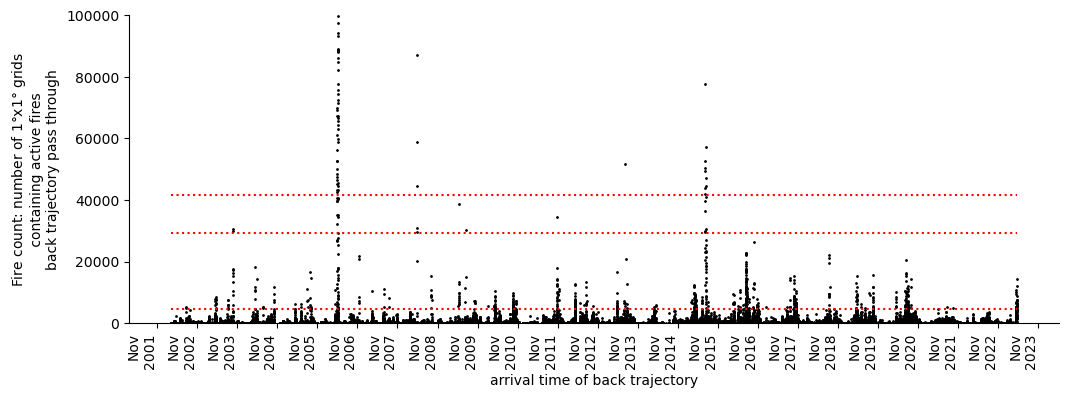

In [16]:
fig = fu_fire.create_basis_plot(df_fire_count, ymax=100000, N=10, log=False)
plt.show()

## frequency plot: 

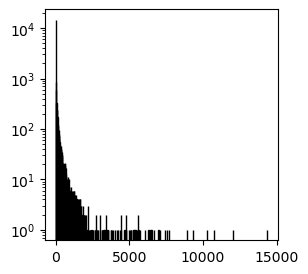

In [13]:
fig, ax = plt.subplots(figsize=(3,3))
ax.hist(df_fire_count['fire_count'].values, bins=1000,
             color = 'blue', edgecolor = 'black')
ax.set_yscale('log')
plt.show()

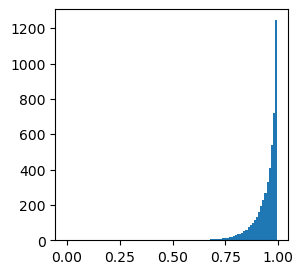

In [16]:
percentiles = np.arange(0,1,0.01)
perc = [df_fire_count['fire_count'].quantile(p) for p in np.arange(0,1,0.01)]
percs = [df_fire_count['fire_count'].quantile(p) for p in np.arange(0,1,0.01)]

for perc_value in percs:
    number = df_fire_count[df_fire_count['fire_count'] > perc_value ].count() 
    
fig, ax = plt.subplots(figsize=(3,3))
ax.bar(percentiles, perc, width=0.01)
plt.show()

## Save: 

In [ ]:
fu_fire.save_df(df_fire_count, path=r'C:\Users\DominicHeslinRees\Documents\Analysis\fire', 
                 name='fire_based_on_abs')

# GFED

In [17]:
GFED_path = 'D:\\df_trajs_GFED'

In [18]:
dict_dtypes = {'Traj_num': np.dtype('int8'),
 'time_step': np.dtype('float32'),
 'latitude': np.dtype('float32'),
 'longitude': np.dtype('float32'),
 'altitude': np.dtype('float32'),
 'RAINFALL': np.dtype('float32'),
 'MIXDEPTH': np.dtype('float32'),
 'grid_lon': np.dtype('int32'),
 'grid_lat': np.dtype('int32'),
 'obs': np.dtype('float32'),
 'BC_GFED': np.dtype('float32')}

In [19]:
def read_in_months(year, months):
    DFs = []
    for month in months:
        print("month: "+str(month))
        try:
            month = "{:02d}".format(month) #make 0X
            df_month = pd.read_csv(GFED_path+'\\'+str(year)+'_'+str(month)+'_GFED_ML.dat',
                                   dtype=dict_dtypes, parse_dates=['DateTime', 'arrival_time'])
            DFs.append(df_month)
        except:
            pass
    df = pd.concat(DFs)
    df['arrival_time'] = pd.to_datetime(df['arrival_time'])
    return df

In [20]:
def groupby_divide(df):
    df_groupby = df.groupby('arrival_time').sum()['BC_GFED']
    df_groupby = df_groupby.to_frame()

    df_Traj_num = df.groupby('arrival_time')['Traj_num'].nunique()
    df_Traj_num = df_Traj_num.to_frame()

    df_groupby_ = df_groupby.div(df_Traj_num.values)
    try:
        del df_groupby
        del df_Traj_num
    except:
        pass
    return df_groupby_

## append data: 

In [21]:
DFs = []
for year in np.arange(2003, 2023, 1):
    print("year: "+str(year))
    df = read_in_months(year, months=np.arange(1,13,1))
    df = groupby_divide(df)
    DFs.append(df)
df_years_ = pd.concat(DFs)

year: 2003
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
month: 12
year: 2004
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
month: 12
year: 2005
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
month: 12
year: 2006
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
month: 12
year: 2007
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
month: 12
year: 2008
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
month: 12
year: 2009
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
month: 12
year: 2010
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
month: 12
year: 2011
month: 1
mont

## plot: 

In [ ]:
def fancy(ax, fontsize=20):    
    # thickning the axes spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')        
    # set the fontsize for all your ticks    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)        
    # properties of the ticks
    ax.tick_params(direction='out', length=8, width=2, pad=10, bottom=True, top=False, left=True, right=False, color='k')    
    # add a grid to the plot
    ax.grid(True, alpha=0.5)    
    # mask top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def quick_plot(df_groupby, df_fire_count, ms=2, fontsize=12):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,12), sharex=True)
    ax1.plot(df_groupby.index, df_groupby['BC_GFED'], 'o', mfc='None', mec='k', alpha=.8, ms=ms)
    fancy(ax1, fontsize=fontsize)

    ax1.set_ylabel('Sum of BC emissions,\n GFED [g BCm$^{-2}$]', fontsize=12)
    ax1.set_ylim(0, 1.5)

    ax2.plot(df_fire_count.index, df_fire_count['fire_count'], 'o', mfc='None', mec='r', alpha=.8, ms=ms)
    ax2.set_xlim(df_groupby.index[0], df_groupby.index[-1])
    ax2.set_ylabel('Active fire count,\n MODIS [-]', fontsize=12)
    ax2.set_ylim(0, 50000)
    fancy(ax2, fontsize=fontsize)
    
    ax3.plot(df_abs637.index, df_abs637['abs637'], 'o', mfc='None', mec='k', alpha=.8, ms=ms)
    ax3.set_xlim(df_abs637.index[0],  df_abs637.index[-1])
    ax3.set_ylabel('$\sigma_{\mathrm{ap}}$ [Mm$^{-1}$]', fontsize=12)
    #ax3.set_ylim(0, 50000)
    fancy(ax3, fontsize=fontsize)

    plt.show()

In [ ]:
fu_fire.save_df(df_years_, path=r'C:\Users\DominicHeslinRees\Documents\Analysis\fire', 
                 name='GFED')

In [ ]:
quick_plot(df_years_, df_fire_count, ms=2, fontsize=15)

# Stats:

In [1]:
import sys

sys.path.append(r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts\Trends')
import trends_functions as fu_trends

df_fire_count = fu_trends.create_month_season_numbers(df_fire_count)

NameError: name 'df_fire_count' is not defined

In [22]:
#['2006-04-21':'2006-05-07']

In [25]:
def remove_extreme_event(df, start_remove, end_remove):
    print(len(df))
    df = df.loc[~df.index.isin(df.index[df.index.slice_indexer(start_remove, end_remove)])]
    print(len(df))
    return df

In [26]:
df_removed = remove_extreme_event(df_fire_count, '2006-04-21', '2006-05-07')

161991
161625


In [46]:
def sigfig(value):
    valuesf = float('%.3g' % value)
    return valuesf

def calculate_mean(df, var='BC_GFED', scalar=1):
    df = df[var].copy()
    print("2002 - 2007")
    mean_2002_2007 = df.loc['2002-01-01 00:00:00': '2007-12-31 23:59:59'].mean()*scalar
    print(sigfig(mean_2002_2007))
    print("2008 - 2012")
    mean_2008_2012 = df.loc['2008-01-01 00:00:00': '2012-12-31 23:59:59'].mean()*scalar
    print(sigfig(mean_2008_2012))
    print("2013 - 2017")
    mean_2013_2017 = df.loc['2013-01-01 00:00:00': '2017-12-31 23:59:59'].mean()*scalar
    print(sigfig(mean_2013_2017))
    print("2018 - 2023")
    mean_2018_2023 = df.loc['2018-01-01 00:00:00': '2023-12-31 23:59:59'].mean()*scalar
    print(sigfig(mean_2018_2023))

In [53]:
def for_seasons(df, season, var='fire_count', scalar=1):
    df_season = df[df['season_abb'] == season]
    calculate_mean(df_season, var, scalar)

In [54]:
for_seasons(df_fire_count, season='AHZ')
print("\n removed")
for_seasons(df_removed, season='AHZ')

2002 - 2007
619.0
2008 - 2012
104.0
2013 - 2017
129.0
2018 - 2023
78.8

 removed
2002 - 2007
56.2
2008 - 2012
104.0
2013 - 2017
129.0
2018 - 2023
78.8


In [57]:
for_seasons(df_fire_count, season='SUM')

2002 - 2007
71.4
2008 - 2012
95.8
2013 - 2017
326.0
2018 - 2023
178.0


In [56]:
for_seasons(df_fire_count, season='SBU')

2002 - 2007
20.1
2008 - 2012
68.8
2013 - 2017
65.2
2018 - 2023
38.0


# Case studies for fire events: 

For the year 2020

## Circular plots: 

With an example choosing the day '2020-10-06 07:00:00' as the example event day

start date: 2020-10-06
end date: 2020-09-26
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
6.0
6.0
6.0
6.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
20.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

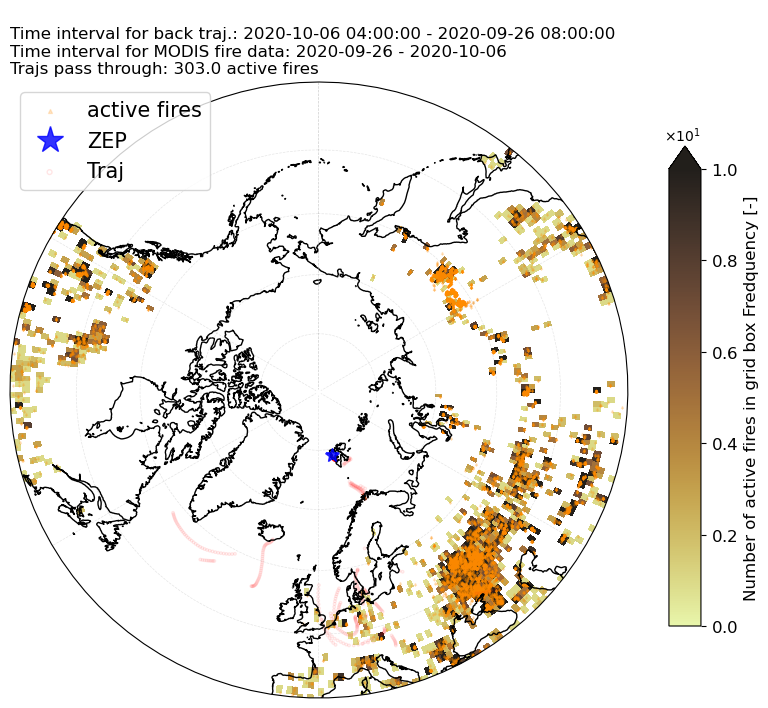

saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\example_fire_traj_2020.jpeg


In [192]:
fig = fu_fire.example_circular_plot(df_fire_2020, trajs_dictionary_2020, '2020-10-06 07:00:00')
fu_fire.save_plot(fig, name='example_fire_traj_2020')

## Intervals: 

Use to select +12 hours -12 hours 

In [13]:
fire_events = ['2020-07-04 07:00:00.028800', '2020-10-06 07:00:00.028800', '2020-07-24 19:00:00.028800']
fire_events = [pd.to_datetime(x).replace(microsecond=0) for x in fire_events]
print(fire_events)

fire_events = ['2020-07-07','2020-07-26','2020-10-06']
fire_events = [pd.to_datetime(x).replace(microsecond=0) for x in fire_events]
print(fire_events)

[Timestamp('2020-07-04 07:00:00'), Timestamp('2020-10-06 07:00:00'), Timestamp('2020-07-24 19:00:00')]
[Timestamp('2020-07-07 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-06 00:00:00')]


In [15]:
def get_interval(fire_events, number, minus_hours=12, add_hours=12):
    """takes a list of the fire events"""
    datetime_minus_12 = fire_events[number] - timedelta(hours=minus_hours, minutes=0)
    print(datetime_minus_12)
    datetime_add_12 = fire_events[number] + timedelta(hours=add_hours, minutes=0)
    print(datetime_add_12)
    fire_events_interval = pd.date_range(start=datetime_minus_12, end=datetime_add_12, 
                                        freq='H',)
    return fire_events_interval

In [16]:
def create_fire_freq_array(start_array_time, end_array_time, df_fire):
    df_fire_sliced_timewise = df_fire[(end_array_time <= df_fire.index) & (df_fire.index <= start_array_time)]
    fire_freq_array = fu_fire.create_array(df_fire_sliced_timewise)
    return fire_freq_array

In [50]:
fire_events_interval = get_interval(fire_events, number=2, minus_hours=12, add_hours=12)

2020-10-05 12:00:00
2020-10-06 12:00:00


2020-10-05 12:00:00
2020-10-06 12:00:00
2020-10-05 12:00:00
2020-10-06 12:00:00
files: 1
4464712
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
2367936
use list
Year: 2020
Path: D:\HYSPLIT\processed\2020\
Number of HYSPLIT files for 2020: 8013
Matching files from observational data & HYSPLIT: 25
mixed layer selected
D:\HYSPLIT\processed\2020\20201005_12.dat
Index(['Traj_num', 'meteorological_grid_num', 'FORECAST_hour', 'time_step',
       'latitude', 'longitude', 'altitude', 'PRESSURE', 'THETA', 'AIR_TEMP',
       'RAINFALL', 'MIXDEPTH', 'RELHUMID', 'SPCHUMID', 'H2OMIXRA', 'TERR_MSL',
       'SUN_FLUX', 'arrival_time', 'latitude_previous', 'longitude_previous',
       'altitude_previous', 'distance', 'grid_lon', 'grid_lat'],
      dtype='object')
                     Traj_num  meteorological_grid_num  FORECAST_hour  \
DateTime                                                                
2020-10-05 12:00:00         1                        1              0 

6480
arrival time: 2020-10-05 14:00:00
D:\HYSPLIT\processed\2020\20201005_15.dat
Index(['Traj_num', 'meteorological_grid_num', 'FORECAST_hour', 'time_step',
       'latitude', 'longitude', 'altitude', 'PRESSURE', 'THETA', 'AIR_TEMP',
       'RAINFALL', 'MIXDEPTH', 'RELHUMID', 'SPCHUMID', 'H2OMIXRA', 'TERR_MSL',
       'SUN_FLUX', 'arrival_time', 'latitude_previous', 'longitude_previous',
       'altitude_previous', 'distance', 'grid_lon', 'grid_lat'],
      dtype='object')
                     Traj_num  meteorological_grid_num  FORECAST_hour  \
DateTime                                                                
2020-10-05 15:00:00         1                        1              3   
2020-10-05 15:00:00         2                        1              3   
2020-10-05 15:00:00         3                        1              3   
2020-10-05 15:00:00         4                        1              3   
2020-10-05 15:00:00         5                        1              3   
...        

6480
arrival time: 2020-10-05 19:00:00
D:\HYSPLIT\processed\2020\20201005_20.dat
Index(['Traj_num', 'meteorological_grid_num', 'FORECAST_hour', 'time_step',
       'latitude', 'longitude', 'altitude', 'PRESSURE', 'THETA', 'AIR_TEMP',
       'RAINFALL', 'MIXDEPTH', 'RELHUMID', 'SPCHUMID', 'H2OMIXRA', 'TERR_MSL',
       'SUN_FLUX', 'arrival_time', 'latitude_previous', 'longitude_previous',
       'altitude_previous', 'distance', 'grid_lon', 'grid_lat'],
      dtype='object')
                     Traj_num  meteorological_grid_num  FORECAST_hour  \
DateTime                                                                
2020-10-05 20:00:00         1                        1              2   
2020-10-05 20:00:00         2                        1              2   
2020-10-05 20:00:00         3                        1              2   
2020-10-05 20:00:00         4                        1              2   
2020-10-05 20:00:00         5                        1              2   
...        

D:\HYSPLIT\processed\2020\20201006_01.dat
Index(['Traj_num', 'meteorological_grid_num', 'FORECAST_hour', 'time_step',
       'latitude', 'longitude', 'altitude', 'PRESSURE', 'THETA', 'AIR_TEMP',
       'RAINFALL', 'MIXDEPTH', 'RELHUMID', 'SPCHUMID', 'H2OMIXRA', 'TERR_MSL',
       'SUN_FLUX', 'arrival_time', 'latitude_previous', 'longitude_previous',
       'altitude_previous', 'distance', 'grid_lon', 'grid_lat'],
      dtype='object')
                     Traj_num  meteorological_grid_num  FORECAST_hour  \
DateTime                                                                
2020-10-06 01:00:00         1                        1              1   
2020-10-06 01:00:00         2                        1              1   
2020-10-06 01:00:00         3                        1              1   
2020-10-06 01:00:00         4                        1              1   
2020-10-06 01:00:00         5                        1              1   
...                       ...                     

Index(['Traj_num', 'meteorological_grid_num', 'FORECAST_hour', 'time_step',
       'latitude', 'longitude', 'altitude', 'PRESSURE', 'THETA', 'AIR_TEMP',
       'RAINFALL', 'MIXDEPTH', 'RELHUMID', 'SPCHUMID', 'H2OMIXRA', 'TERR_MSL',
       'SUN_FLUX', 'arrival_time', 'latitude_previous', 'longitude_previous',
       'altitude_previous', 'distance', 'grid_lon', 'grid_lat'],
      dtype='object')
                     Traj_num  meteorological_grid_num  FORECAST_hour  \
DateTime                                                                
2020-10-06 06:00:00         1                        1              0   
2020-10-06 06:00:00         2                        1              0   
2020-10-06 06:00:00         3                        1              0   
2020-10-06 06:00:00         4                        1              0   
2020-10-06 06:00:00         5                        1              0   
...                       ...                      ...            ...   
2020-09-26 06:00:00

Index(['Traj_num', 'meteorological_grid_num', 'FORECAST_hour', 'time_step',
       'latitude', 'longitude', 'altitude', 'PRESSURE', 'THETA', 'AIR_TEMP',
       'RAINFALL', 'MIXDEPTH', 'RELHUMID', 'SPCHUMID', 'H2OMIXRA', 'TERR_MSL',
       'SUN_FLUX', 'arrival_time', 'latitude_previous', 'longitude_previous',
       'altitude_previous', 'distance', 'grid_lon', 'grid_lat'],
      dtype='object')
                     Traj_num  meteorological_grid_num  FORECAST_hour  \
DateTime                                                                
2020-10-06 12:00:00         1                        1              0   
2020-10-06 12:00:00         2                        1              0   
2020-10-06 12:00:00         3                        1              0   
2020-10-06 12:00:00         4                        1              0   
2020-10-06 12:00:00         5                        1              0   
...                       ...                      ...            ...   
2020-09-26 12:00:00

0.0
0.0
0.0
0.0
0.0
19.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
19.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
70.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
70.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
70.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
70.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
2.0
19.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
19.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
19.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
19.0
0.0
19.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
0.0
85.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
0.0
85.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
29.0
85.0
12.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
29.0
85.0
12.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
29.0
54.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
19.0
54.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
14.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
45.0
0.0
5.0
1.0
3.0
0.0
0.0
0.0
0.0
5.0
0.0
3.0
5.0
3.0
12.0
0.0
3.0
0.0
0.0
0.0
0.0
21.0
12.0
3.0
0.0
12.0
3.0
5.0
1.0
3.0
0.0
0.0
0.0
12.0
5.0
0.0
0.0
12.0
3.0
3.0
1.0
0.0
0.0
0.0
0.0
0.0
12.0
5.0
0.0
0.0
5.0
3.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
17.0
0.0
0.0
0.0
17.0
0.0
0.0
0.0
1.0
17.0
0.0
17.0
0.0
1.0
0.0
0.0
0.0
0.0
37.0
1.0
0.0
17.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

0.0
0.0
0.0
0.0
0.0
0.0
3.0
74.0
0.0
12.0
12.0
12.0
0.0
0.0
16.0
0.0
0.0
0.0
74.0
0.0
0.0
0.0
0.0
74.0
0.0
5.0
5.0
12.0
5.0
0.0
0.0
16.0
0.0
0.0
0.0
45.0
0.0
3.0
0.0
0.0
0.0
12.0
0.0
5.0
5.0
12.0
0.0
0.0
0.0
0.0
7.0
0.0
12.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
12.0
0.0
0.0
0.0
0.0
7.0
0.0
10.0
0.0
0.0
0.0
0.0
0.0
10.0
0.0
0.0
0.0
12.0
0.0
0.0
0.0
19.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
12.0
0.0
30.0
0.0
0.0
25.0
0.0
7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
45.0
0.0
0.0
25.0
0.0
7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
17.0
17.0
0.0
17.0
5.0
0.0
0.0
10.0
0.0
7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
17.0
17.0
0.0
1.0
5.0
0.0
0.0
21.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
12.0
0.0
0.0
14.0
0.0
17.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
14.0
0.0
7.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
11.0
0.0
7.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
11.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
0.0
30.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
0.0
6.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
1.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
6.0
6.0
0.0
0.0
6.0
0.0
6.0
6.0
0.0
6.0
6.0
0.0
6.0
6.0
6.0
0.0
6.0
6.0
0.0
6.0
0.0
0.0
0.0


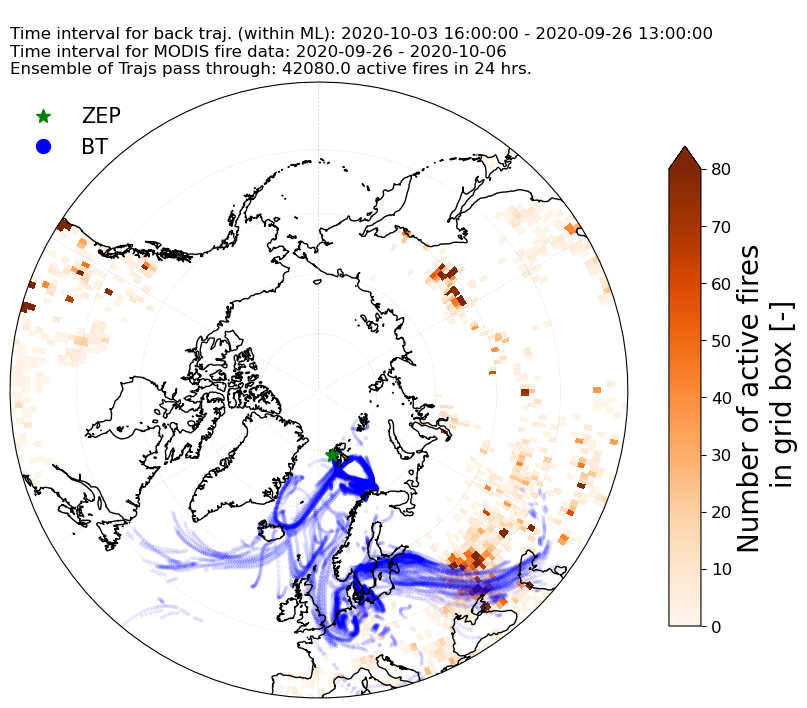

saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\2020_10_06.pdf


In [61]:
number=2 #select the event out of the list
fire_events_interval = get_interval(fire_events, number)

if number == 0:
    fire_events_interval = get_interval(fire_events, number, minus_hours=24, add_hours=0)
if number == 1:
    fire_events_interval = get_interval(fire_events, number, minus_hours=24, add_hours=0)
if number == 2:
    fire_events_interval = get_interval(fire_events, number, minus_hours=12, add_hours=12)
    
df_fire_2020, trajs_dictionary_2020 = fu_fire.produce_df_fire_trajs_dictionary(df_obs=None, year=2020, 
                                                                       fire_path='C:\\Users\\DominicHeslinRees\\Documents\\Data\\NASA_FIRE\\MODIS\\',
                                                                       inpath_processed_hysplit_dfs="D:\\HYSPLIT\\processed\\",
                                                                       obs_indexes=fire_events_interval, number_of_days=10)

list([*trajs_dictionary_2020.keys()])[0]
df_traj = trajs_dictionary_2020[str(list([*trajs_dictionary_2020.keys()])[0])]
end_array_time = fu_fire.to_datetime(str(df_traj.index[-1]))

start_array_time = list([*trajs_dictionary_2020.keys()])[-1]


fire_freq_array = create_fire_freq_array(start_array_time, end_array_time, df_fire_2020)

df_trajs_concatted = pd.concat(trajs_dictionary_2020.values(), ignore_index=False)

df_fire_sliced_timewise = df_fire_2020[(end_array_time <= df_fire_2020.index) & (df_fire_2020.index <= start_array_time)]
fire_freq_array = create_fire_freq_array(start_array_time, end_array_time, df_fire_sliced_timewise)

fig = fu_fire.circular_plots_array(fire_freq_array, df_trajs_concatted, df_fire_sliced_timewise, plot_fire=False,
                            arrival_time=fire_events[number], count_fires=True, scientific_notation=False,
                                  colourbar_label="Number of active fires\n in grid box [-]", vmax=80,
                                  cmap='Oranges')
fu_fire.save_plot(fig,
    path='C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots',
    folder='',
    name=str(fire_events[number])[:10].replace('-','_'),
    format_of_plot='.pdf')

## HYSPLIT Traj plots: 

In [157]:
import sys

sys.path.append(r'C:\Users\DominicHeslinRees\Documents\GitHub\HYSPLIT_plotting')
import HYSPLIT_plotting as HYplot

%load_ext autoreload
%autoreload 2

import pandas as pd
import cmocean

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Matching files from observational data & HYSPLIT: 25
mixed layer selected


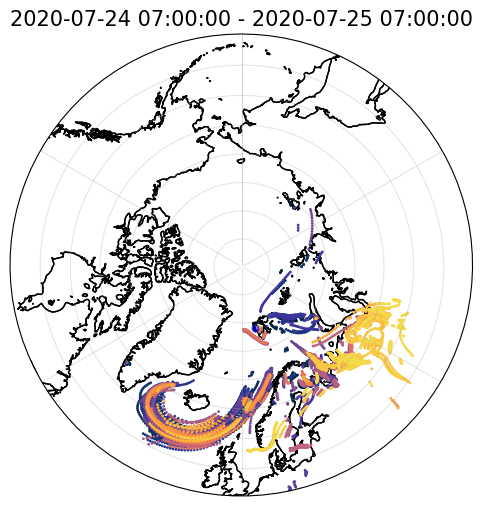

In [169]:
time_range = list(pd.date_range('2020-07-03 19:00:00', '2020-07-04 19:00:00', freq='H')) #using time range
time_range = list(pd.date_range('2020-10-05 19:00:00', '2020-10-06 19:00:00', freq='H')) #using time range
time_range = list(pd.date_range('2020-07-24 07:00:00', '2020-07-25 07:00:00', freq='H')) #using time range

title = str(time_range[0]) + ' - '+str(time_range[-1])
#time_range = fire_events_interval

#convert the datetimes to HYSPLIT names
HYSPLIT_names_obs = HYplot.create_HYSPLIT_name_from_list(time_range) #for whole period

#list all the preprocessed HYSPLIT files - ones actually have preprocessed
list_of_HYSPLIT_files = HYplot.list_files(year=2020, 
                                          inpath_processed_hysplit_dfs="D:\\HYSPLIT\\processed\\")

#match the files with the datetimes interested
matching_list_of_back_traj_files = HYplot.find_matching_files(list_of_HYSPLIT_files, HYSPLIT_names_obs)

#read in the matching files 
trajs_dictionary = HYplot.create_traj_dictionary_using_matching_files(matching_list_of_back_traj_files, 
                                                                      select_for_mixed_layer=True)

fig = HYplot.circular_traj_plots(trajs_dictionary, title=title)

In [84]:
obs_indexes=fire_events_interval

HYSPLIT_names_obs = fu_fire.create_HYSPLIT_name_from_list(obs_indexes)
list_of_HYSPLIT_files = fu_fire.list_files(year=2020, inpath_processed_hysplit_dfs="D:\\HYSPLIT\\processed\\")
matching_list_of_back_traj_files = fu_fire.find_matching_files(list_of_HYSPLIT_files, HYSPLIT_names_obs)

trajs_dictionary = fu_fire.create_traj_dictionary_using_matching_files(matching_list_of_back_traj_files, number_of_days=5)

Year: 2020
Path: D:\HYSPLIT\processed\2020\
Number of HYSPLIT files for 2020: 8013
Matching files from observational data & HYSPLIT: 25
['D:\\HYSPLIT\\processed\\2020\\20200703_19.dat', 'D:\\HYSPLIT\\processed\\2020\\20200703_20.dat', 'D:\\HYSPLIT\\processed\\2020\\20200703_21.dat', 'D:\\HYSPLIT\\processed\\2020\\20200703_22.dat', 'D:\\HYSPLIT\\processed\\2020\\20200703_23.dat', 'D:\\HYSPLIT\\processed\\2020\\20200704_00.dat', 'D:\\HYSPLIT\\processed\\2020\\20200704_01.dat', 'D:\\HYSPLIT\\processed\\2020\\20200704_02.dat', 'D:\\HYSPLIT\\processed\\2020\\20200704_03.dat', 'D:\\HYSPLIT\\processed\\2020\\20200704_04.dat', 'D:\\HYSPLIT\\processed\\2020\\20200704_05.dat', 'D:\\HYSPLIT\\processed\\2020\\20200704_06.dat', 'D:\\HYSPLIT\\processed\\2020\\20200704_07.dat', 'D:\\HYSPLIT\\processed\\2020\\20200704_08.dat', 'D:\\HYSPLIT\\processed\\2020\\20200704_09.dat', 'D:\\HYSPLIT\\processed\\2020\\20200704_10.dat', 'D:\\HYSPLIT\\processed\\2020\\20200704_11.dat', 'D:\\HYSPLIT\\processed\\2020\

                     Traj_num  meteorological_grid_num  FORECAST_hour  \
DateTime                                                                
2020-07-03 22:00:00         1                        1              2   
2020-07-03 22:00:00         2                        1              2   
2020-07-03 22:00:00         3                        1              2   
2020-07-03 22:00:00         4                        1              2   
2020-07-03 22:00:00         5                        1              2   
...                       ...                      ...            ...   
2020-06-23 22:00:00        23                        1              2   
2020-06-23 22:00:00        24                        1              2   
2020-06-23 22:00:00        25                        1              2   
2020-06-23 22:00:00        26                        1              2   
2020-06-23 22:00:00        27                        1              2   

                     time_step  latitude  longitud

                     Traj_num  meteorological_grid_num  FORECAST_hour  \
DateTime                                                                
2020-07-04 04:00:00         1                        1              2   
2020-07-04 04:00:00         2                        1              2   
2020-07-04 04:00:00         3                        1              2   
2020-07-04 04:00:00         4                        1              2   
2020-07-04 04:00:00         5                        1              2   
...                       ...                      ...            ...   
2020-06-24 04:00:00        23                        1              2   
2020-06-24 04:00:00        24                        1              2   
2020-06-24 04:00:00        25                        1              2   
2020-06-24 04:00:00        26                        1              2   
2020-06-24 04:00:00        27                        1              2   

                     time_step  latitude  longitud

                     Traj_num  meteorological_grid_num  FORECAST_hour  \
DateTime                                                                
2020-07-04 10:00:00         1                        1              2   
2020-07-04 10:00:00         2                        1              2   
2020-07-04 10:00:00         3                        1              2   
2020-07-04 10:00:00         4                        1              2   
2020-07-04 10:00:00         5                        1              2   
...                       ...                      ...            ...   
2020-06-24 10:00:00        23                        1              2   
2020-06-24 10:00:00        24                        1              2   
2020-06-24 10:00:00        25                        1              2   
2020-06-24 10:00:00        26                        1              2   
2020-06-24 10:00:00        27                        1              2   

                     time_step  latitude  longitud

                     Traj_num  meteorological_grid_num  FORECAST_hour  \
DateTime                                                                
2020-07-04 16:00:00         1                        1              2   
2020-07-04 16:00:00         2                        1              2   
2020-07-04 16:00:00         3                        1              2   
2020-07-04 16:00:00         4                        1              2   
2020-07-04 16:00:00         5                        1              2   
...                       ...                      ...            ...   
2020-06-24 16:00:00        23                        1              2   
2020-06-24 16:00:00        24                        1              2   
2020-06-24 16:00:00        25                        1              2   
2020-06-24 16:00:00        26                        1              2   
2020-06-24 16:00:00        27                        1              2   

                     time_step  latitude  longitud

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
2.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
11.0
1.0
0.0
6.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.0
11.0
0.0
0.0
0.0
11.0
0.0
0.0
0.0
0.0
11.0
11.0
11.0
0.0
0.0
11.0
0.0
10.0
8.0
0.0
0.0
11.0
0.0
0.0
0.0
0.0
11.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
11.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
2.0
2.0
0.0
2.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


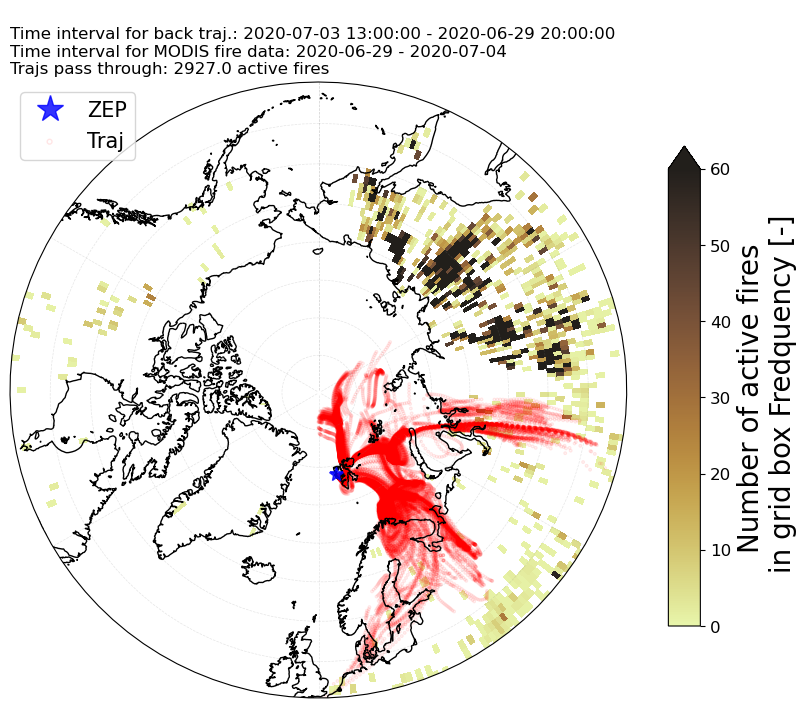

In [144]:
df_fire_sliced_timewise = df_fire_2020[(end_array_time <= df_fire_2020.index) & (df_fire_2020.index <= start_array_time)]
fire_freq_array = create_fire_freq_array(start_array_time, end_array_time, df_fire_sliced_timewise)

fig = fu_fire.circular_plots_array(fire_freq_array, df_trajs_concatted, df_fire_sliced_timewise, plot_fire=False,
                            arrival_time='2020-07-04 07:00:00', count_fires=True, scientific_notation=False,
                                  colourbar_label="Number of active fires\n in grid box Fredquency [-]", vmax=60)

In [ ]:
fig = fu_fire.example_circular_plot(df_fire_2020, trajs_dictionary_2020, '2020-07-04 00:00:00')
fu_fire.save_plot(fig, name='example_fire_traj_2020')